In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [3]:
df_init = pd.read_csv("data/lof/data-lof-2024-04-07.csv")
df = pd.read_csv("data/inc/data-inc-2024-04-15.csv")

In [4]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85823 entries, 0 to 85822
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        85823 non-null  float64
 1   id_mls                    85823 non-null  object 
 2   bathrooms_total           85823 non-null  float64
 3   bedrooms_extra            85823 non-null  float64
 4   bedrooms                  85823 non-null  float64
 5   stories_total             85823 non-null  float64
 6   size_interior             85823 non-null  float64
 7   building_type             85823 non-null  object 
 8   agency_name               85823 non-null  object 
 9   agency_type               85823 non-null  object 
 10  property_type             85823 non-null  object 
 11  lng                       85823 non-null  float64
 12  lat                       85823 non-null  float64
 13  ownership_type            85823 non-null  object 
 14  owners

# First Glance

In [5]:
df.head()

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26766434,X8244966,4,5,2.0,NaN,House,CENTURY 21 PREMIUM REALTY,Firm,Single Family,...,42.101378,Freehold,1,60.01 x 127.95 FT,8,https://realtor.ca/real-estate/26766434/311-be...,638489934074770000,N9V0G7,Ontario,999990.0
1,26765212,24007988,2,2 + 0,NaN,1122.0000,Apartment,THE DAN GEMUS REAL ESTATE TEAM LTD. - 520,Firm,Single Family,...,42.248764,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765212/5840-n...,638489812594830000,N9J0E3,Ontario,524900.0
2,26765207,24008037,2,2 + 0,NaN,1000.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,Single Family,...,42.102268,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765207/90-mur...,638489812565170000,N9V4B9,Ontario,349900.0
3,26765208,24008034,0,0 + 0,NaN,NaN,none,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,...,42.321533,none,none,30X97.5,0,https://realtor.ca/real-estate/26765208/vl-cha...,638489812567230000,N9A2X6,Ontario,149000.0
4,26765209,24008032,0,0,NaN,NaN,No Building,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Vacant Land,...,42.321533,none,none,30 X 97.5,0,https://realtor.ca/real-estate/26765209/vl-cha...,638489812568670000,N9A2X6,Ontario,149000.0


In [6]:
df.shape

(38218, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38218 entries, 0 to 38217
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        38218 non-null  int64  
 1   id_mls                    38218 non-null  object 
 2   bathrooms_total           38218 non-null  int64  
 3   bedrooms                  38218 non-null  object 
 4   stories_total             24194 non-null  float64
 5   size_interior             20710 non-null  object 
 6   building_type             38218 non-null  object 
 7   agency_name               38218 non-null  object 
 8   agency_type               38218 non-null  object 
 9   property_type             38218 non-null  object 
 10  lng                       38218 non-null  float64
 11  lat                       38218 non-null  float64
 12  ownership_type            38218 non-null  object 
 13  ownership_type_group_ids  38218 non-null  object 
 14  land_s

In [8]:
df_with_size = df[df["size_interior"].notna()]
df_with_size

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
1,26765212,24007988,2,2 + 0,NaN,1122.0000,Apartment,THE DAN GEMUS REAL ESTATE TEAM LTD. - 520,Firm,Single Family,...,42.248764,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765212/5840-n...,638489812594830000,N9J0E3,Ontario,524900.0
2,26765207,24008037,2,2 + 0,NaN,1000.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,Single Family,...,42.102268,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765207/90-mur...,638489812565170000,N9V4B9,Ontario,349900.0
5,26765204,24008041,2,2 + 0,NaN,1000.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,Single Family,...,42.102268,Freehold,1,0X,0,https://realtor.ca/real-estate/26765204/90-mur...,638489812557370000,N9V4B9,Ontario,349900.0
9,26762962,24007990,3,2 + 0,NaN,2450.0000,Apartment,LC PLATINUM REALTY INC. - 525,Firm,Single Family,...,42.316242,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26762962/1225-r...,638489668557130000,N9A0A2,Ontario,1238000.0
11,26762960,24007993,6,5 + 0,2.0,5204.0000,House,RE/MAX CARE REALTY - 828,Firm,Single Family,...,42.212191,Freehold,1,200X400,0,https://realtor.ca/real-estate/26762960/7621-d...,638489668544600000,N9A6Z6,Ontario,2800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38213,26732749,5748,2,3,NaN,1364 sqft,Manufactured Home,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.434449,none,none,4337,0,https://realtor.ca/real-estate/26732749/135-ha...,638483743454100000,NaN,Northwest Territories,524900.0
38214,26726392,5747,2,3,NaN,1651 sqft,Manufactured Home,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.462869,none,none,6674,0,https://realtor.ca/real-estate/26726392/105-de...,638482866269800000,NaN,Northwest Territories,614900.0
38215,26726238,5746,2,3,NaN,1216 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.451990,none,none,6601,0,https://realtor.ca/real-estate/26726238/110-je...,638482843506300000,X1A3V3,Northwest Territories,454900.0
38216,26721093,5745,1,1,NaN,903 sqft,Apartment,COLDWELL BANKER NBS,Firm,Single Family,...,62.453589,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26721093/1201-5...,638482012223800000,NaN,Northwest Territories,335000.0


In [9]:
df_with_size["province"].value_counts()

province
British Columbia           6875
Ontario                    4848
Alberta                    3810
Quebec                     2577
Saskatchewan                963
Manitoba                    952
New Brunswick               437
Newfoundland & Labrador     203
Yukon                        29
Northwest Territories        16
Name: count, dtype: int64

In [10]:
df["province"].value_counts()

province
Ontario                    16846
British Columbia            7344
Quebec                      5708
Alberta                     4113
Saskatchewan                1120
Manitoba                    1081
Nova Scotia                  896
New Brunswick                598
Newfoundland & Labrador      262
Prince Edward Island         202
Yukon                         32
Northwest Territories         16
Name: count, dtype: int64

In [11]:
np.round(df.describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,38218.0,38218.0,24194.0,38218.0,38218.0,38218.0,3.821800e+04,38218.0
mean,26742169.0,2.0,2.0,-91.0,47.0,2.0,6.384856e+17,901370.0
std,14954.0,1.0,4.0,20.0,3.0,5.0,2.818919e+12,1436932.0
min,26715030.0,0.0,0.0,-135.0,42.0,0.0,6.384800e+17,1.0
25%,26729433.0,1.0,1.0,-114.0,44.0,0.0,6.384835e+17,419900.0
50%,26742394.0,2.0,2.0,-80.0,46.0,1.0,6.384853e+17,664000.0
75%,26755228.0,3.0,2.0,-78.0,49.0,4.0,6.384883e+17,999900.0
max,26767394.0,28.0,350.0,-53.0,62.0,624.0,6.384902e+17,124960000.0


# Remove Duplicates

In [12]:
len(df["id"].unique())

38206

In [13]:
ids = df["id"]
print(df[ids.isin(ids[ids.duplicated()])].sort_values("id").shape[0])
df[ids.isin(ids[ids.duplicated()])].sort_values("id")

24


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
26962,26722980,R2868006,3,3,NaN,1520 sqft,House,RE/MAX City Realty,Firm,Single Family,...,49.417620,Freehold,1,2.6 ac,0,https://realtor.ca/real-estate/26722980/972-jo...,638482171779200000,V0N2W6,British Columbia,1299000.0
26960,26722980,R2868006,3,3,NaN,1520 sqft,House,RE/MAX City Realty,Firm,Single Family,...,49.417620,Freehold,1,2.6 ac,0,https://realtor.ca/real-estate/26722980/972-jo...,638482171779200000,V0N2W6,British Columbia,1299000.0
26762,26727028,R2868532,2,2,NaN,906 sqft,Apartment,Luxmore Realty,Firm,Single Family,...,49.170518,Strata,2,0,0,https://realtor.ca/real-estate/26727028/615-59...,638482891277330000,V6X4H3,British Columbia,699000.0
26760,26727028,R2868532,2,2,NaN,906 sqft,Apartment,Luxmore Realty,Firm,Single Family,...,49.170518,Strata,2,0,0,https://realtor.ca/real-estate/26727028/615-59...,638482891277330000,V6X4H3,British Columbia,699000.0
9140,26730400,W8219344,2,3,NaN,NaN,none,RIGHT AT HOME REALTY,Firm,Single Family,...,43.695348,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26730400/1205-1...,638483596886370000,M9R2R9,Ontario,599999.0
9141,26730400,W8219344,2,3,NaN,NaN,none,RIGHT AT HOME REALTY,Firm,Single Family,...,43.695348,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26730400/1205-1...,638483596886370000,M9R2R9,Ontario,599999.0
8940,26731572,W8220962,4,4,2.0,NaN,House,UPSTATE REALTY INC.,Firm,Single Family,...,43.635163,Freehold,1,48 x 107.1 FT,5,https://realtor.ca/real-estate/26731572/478-ri...,638483668899530000,L6Y2C9,Ontario,1489000.0
8941,26731572,W8220962,4,4,2.0,NaN,House,UPSTATE REALTY INC.,Firm,Single Family,...,43.635163,Freehold,1,48 x 107.1 FT,5,https://realtor.ca/real-estate/26731572/478-ri...,638483668899530000,L6Y2C9,Ontario,1489000.0
7740,26741097,C8227100,0,0,NaN,NaN,Apartment,RIGHT AT HOME REALTY,Firm,Single Family,...,43.671243,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26741097/2801-8...,638484818349470000,M4W3S5,Ontario,40000.0
7741,26741097,C8227100,0,0,NaN,NaN,Apartment,RIGHT AT HOME REALTY,Firm,Single Family,...,43.671243,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26741097/2801-8...,638484818349470000,M4W3S5,Ontario,40000.0


In [14]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
26962,26722980,R2868006,3,3,NaN,1520 sqft,House,RE/MAX City Realty,Firm,Single Family,...,49.417620,Freehold,1,2.6 ac,0,https://realtor.ca/real-estate/26722980/972-jo...,638482171779200000,V0N2W6,British Columbia,1299000.0
26762,26727028,R2868532,2,2,NaN,906 sqft,Apartment,Luxmore Realty,Firm,Single Family,...,49.170518,Strata,2,0,0,https://realtor.ca/real-estate/26727028/615-59...,638482891277330000,V6X4H3,British Columbia,699000.0
9141,26730400,W8219344,2,3,NaN,NaN,none,RIGHT AT HOME REALTY,Firm,Single Family,...,43.695348,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26730400/1205-1...,638483596886370000,M9R2R9,Ontario,599999.0
8941,26731572,W8220962,4,4,2.0,NaN,House,UPSTATE REALTY INC.,Firm,Single Family,...,43.635163,Freehold,1,48 x 107.1 FT,5,https://realtor.ca/real-estate/26731572/478-ri...,638483668899530000,L6Y2C9,Ontario,1489000.0
7741,26741097,C8227100,0,0,NaN,NaN,Apartment,RIGHT AT HOME REALTY,Firm,Single Family,...,43.671243,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26741097/2801-8...,638484818349470000,M4W3S5,Ontario,40000.0
23519,26752427,28889777,0,0,NaN,NaN,none,RE/MAX de Francheville Inc.,Firm,Vacant Land,...,47.000000,none,none,16190 m2,0,https://realtor.ca/real-estate/26752427/rue-no...,638487996131470000,G0X2C0,Quebec,69000.0
23518,26753027,20753220,0,0,NaN,NaN,none,RE/MAX de Francheville Inc.,Firm,Vacant Land,...,47.000000,none,none,15479 m2,0,https://realtor.ca/real-estate/26753027/rue-no...,638488056734170000,G0X2C0,Quebec,69000.0
12535,26753274,S8235500,6,7,NaN,NaN,Other,FARIS TEAM REAL ESTATE,Firm,Multi-family,...,44.774190,none,none,60.54 x 197.99 FT,0,https://realtor.ca/real-estate/26753274/59-pee...,638488063158000000,L9M1B7,Ontario,1099000.0
5541,26757071,W8238456,3,3 + 1,2.0,NaN,House,SUTTON GROUP REALTY SYSTEMS INC.,Firm,Single Family,...,43.618952,Freehold,1,25.5 x 125 FT,0,https://realtor.ca/real-estate/26757071/14-lou...,638488782435600000,M8V2K6,Ontario,1449900.0
4941,26761426,E8241412,3,3,2.0,NaN,Row / Townhouse,RE/MAX REALTRON PROPERTY GROUP REALTY INC.,Firm,Single Family,...,43.830381,Freehold,1,18.5 x 91.46 FT,2,https://realtor.ca/real-estate/26761426/1515-h...,638489282131630000,L1V7H9,Ontario,874900.0


In [15]:
df = df.drop_duplicates(subset="id", keep=False)

In [16]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [17]:
# df = df.drop(["id", "id_mls"], axis=1)

In [18]:
df.shape

(38194, 21)

# Data Preprocessing (Phase 1)

## Handling Property, Building & Ownership Types

### First Looks

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38194 entries, 0 to 38217
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        38194 non-null  int64  
 1   id_mls                    38194 non-null  object 
 2   bathrooms_total           38194 non-null  int64  
 3   bedrooms                  38194 non-null  object 
 4   stories_total             24188 non-null  float64
 5   size_interior             20704 non-null  object 
 6   building_type             38194 non-null  object 
 7   agency_name               38194 non-null  object 
 8   agency_type               38194 non-null  object 
 9   property_type             38194 non-null  object 
 10  lng                       38194 non-null  float64
 11  lat                       38194 non-null  float64
 12  ownership_type            38194 non-null  object 
 13  ownership_type_group_ids  38194 non-null  object 
 14  land_size  

In [20]:
df["ownership_type"].value_counts()

ownership_type
Freehold                  21004
none                       6286
Condominium/Strata         6120
Strata                     3292
Condominium                 815
Leasehold                   283
Freehold Condo              152
Leasehold Condo/Strata       85
Undivided Co-ownership       72
Shares in Co-operative       23
Unknown                      20
Leasehold/Leased Land        13
Timeshare/Fractional         11
Other, See Remarks            9
Life Lease                    7
Cooperative                   2
Name: count, dtype: int64

In [21]:
df["building_type"].value_counts()

building_type
House                         21024
Apartment                      7482
Row / Townhouse                3737
none                           3038
Duplex                          996
Mobile Home                     296
Triplex                         284
No Building                     241
Multi-Family                    203
Other                           185
Unknown                         159
Fourplex                        140
Recreational                    136
Manufactured Home               129
Manufactured Home/Mobile         88
Modular                          24
Parking                          13
Two Apartment House              12
Commercial Mix                    3
Residential Commercial Mix        2
Commercial Apartment              1
Floathome                         1
Name: count, dtype: int64

In [22]:
df[df["building_type"] == "Other"]["ownership_type"].value_counts()

ownership_type
Freehold                  131
none                       40
Strata                     10
Condominium/Strata          2
Shares in Co-operative      2
Name: count, dtype: int64

In [23]:
df[df["building_type"] == "Special Purpose"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [24]:
df["property_type"].value_counts()

property_type
Single Family    34387
Vacant Land       2923
Multi-family       562
Agriculture        197
Recreational       111
Parking             14
Name: count, dtype: int64

In [25]:
df[df["property_type"] == "Business"]["page_url"]

Series([], Name: page_url, dtype: object)

In [26]:
df[df["property_type"] == "Other"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [27]:
df[df["property_type"] == "Other"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        0 non-null      int64  
 1   id_mls                    0 non-null      object 
 2   bathrooms_total           0 non-null      int64  
 3   bedrooms                  0 non-null      object 
 4   stories_total             0 non-null      float64
 5   size_interior             0 non-null      object 
 6   building_type             0 non-null      object 
 7   agency_name               0 non-null      object 
 8   agency_type               0 non-null      object 
 9   property_type             0 non-null      object 
 10  lng                       0 non-null      float64
 11  lat                       0 non-null      float64
 12  ownership_type            0 non-null      object 
 13  ownership_type_group_ids  0 non-null      object 
 14  land_size                 0

### Property Type: Single Family

In [28]:
df_sf = df[df["property_type"] == "Single Family"]

In [29]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34387 entries, 0 to 38217
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        34387 non-null  int64  
 1   id_mls                    34387 non-null  object 
 2   bathrooms_total           34387 non-null  int64  
 3   bedrooms                  34387 non-null  object 
 4   stories_total             23691 non-null  float64
 5   size_interior             20270 non-null  object 
 6   building_type             34387 non-null  object 
 7   agency_name               34387 non-null  object 
 8   agency_type               34387 non-null  object 
 9   property_type             34387 non-null  object 
 10  lng                       34387 non-null  float64
 11  lat                       34387 non-null  float64
 12  ownership_type            34387 non-null  object 
 13  ownership_type_group_ids  34387 non-null  object 
 14  land_size  

In [30]:
df_sf["province"].value_counts()

province
Ontario                    15502
British Columbia            6804
Quebec                      5052
Alberta                     3767
Saskatchewan                 959
Manitoba                     943
Nova Scotia                  603
New Brunswick                418
Newfoundland & Labrador      185
Prince Edward Island         107
Yukon                         31
Northwest Territories         16
Name: count, dtype: int64

In [31]:
df_sf["building_type"].value_counts()

building_type
House                       21011
Apartment                    7472
Row / Townhouse              3736
Duplex                        843
none                          382
Mobile Home                   296
Triplex                       219
Manufactured Home             129
Fourplex                      103
Manufactured Home/Mobile       88
Recreational                   47
Modular                        24
Other                          20
Two Apartment House            12
Multi-Family                    4
Floathome                       1
Name: count, dtype: int64

In [32]:
df_sf["ownership_type"].value_counts()

ownership_type
Freehold                  18955
Condominium/Strata         6083
none                       4641
Strata                     3241
Condominium                 814
Leasehold                   276
Freehold Condo              152
Leasehold Condo/Strata       83
Undivided Co-ownership       72
Shares in Co-operative       17
Unknown                      16
Leasehold/Leased Land        13
Timeshare/Fractional         11
Life Lease                    7
Other, See Remarks            4
Cooperative                   2
Name: count, dtype: int64

In [33]:
df_sf[df_sf["ownership_type"] == "none"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
3,26765208,24008034,0,0 + 0,NaN,NaN,none,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,...,42.321533,none,none,30X97.5,0,https://realtor.ca/real-estate/26765208/vl-cha...,638489812567230000,N9A2X6,Ontario,149000.0
14,26762257,24007978,2,2 + 0,NaN,1200.0000,Apartment,"COLDWELL BANKER TAILORED REALTY, BROKERAGE",Firm,Single Family,...,42.251214,none,none,NaN,0,https://realtor.ca/real-estate/26762257/3855-s...,638489632476100000,N9G2N7,Ontario,359900.0
15,26762254,24007982,2,2 + 0,NaN,1189.0000,Apartment,MANOR WINDSOR REALTY LTD. - 455,Firm,Single Family,...,42.244426,none,none,0X,0,https://realtor.ca/real-estate/26762254/1855-n...,638489632465200000,N9H2R4,Ontario,399900.0
28,26759594,24007935,3,6 + 0,NaN,2800.0000,Duplex,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,...,42.321250,none,none,30X97.5,0,https://realtor.ca/real-estate/26759594/vl-cha...,638488984667300000,N9A2X6,Ontario,849000.0
51,26754248,X8236210,2,2,2.0,NaN,Duplex,CIRCLE REAL ESTATE,Firm,Single Family,...,42.313481,none,none,44 x 30 FT,0,https://realtor.ca/real-estate/26754248/1160-1...,638488135800530000,N9A4A4,Ontario,449999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38212,26736295,5749,1,3,NaN,1020 sqft,Manufactured Home,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.443551,none,none,30106,0,https://realtor.ca/real-estate/26736295/203-fa...,638484459902230000,NaN,Northwest Territories,359900.0
38213,26732749,5748,2,3,NaN,1364 sqft,Manufactured Home,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.434449,none,none,4337,0,https://realtor.ca/real-estate/26732749/135-ha...,638483743454100000,NaN,Northwest Territories,524900.0
38214,26726392,5747,2,3,NaN,1651 sqft,Manufactured Home,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.462869,none,none,6674,0,https://realtor.ca/real-estate/26726392/105-de...,638482866269800000,NaN,Northwest Territories,614900.0
38215,26726238,5746,2,3,NaN,1216 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.451990,none,none,6601,0,https://realtor.ca/real-estate/26726238/110-je...,638482843506300000,X1A3V3,Northwest Territories,454900.0


In [34]:
df_sf[df_sf["ownership_type"] == "none"]["page_url"]

3        https://realtor.ca/real-estate/26765208/vl-cha...
14       https://realtor.ca/real-estate/26762257/3855-s...
15       https://realtor.ca/real-estate/26762254/1855-n...
28       https://realtor.ca/real-estate/26759594/vl-cha...
51       https://realtor.ca/real-estate/26754248/1160-1...
                               ...                        
38212    https://realtor.ca/real-estate/26736295/203-fa...
38213    https://realtor.ca/real-estate/26732749/135-ha...
38214    https://realtor.ca/real-estate/26726392/105-de...
38215    https://realtor.ca/real-estate/26726238/110-je...
38217    https://realtor.ca/real-estate/26720822/1-ball...
Name: page_url, Length: 4641, dtype: object

In [35]:
df_sf[df_sf["building_type"] == "Modular"]["page_url"]

1645     https://realtor.ca/real-estate/26744836/10-sha...
1659     https://realtor.ca/real-estate/26743372/11-sil...
2020     https://realtor.ca/real-estate/26756494/47-alg...
2172     https://realtor.ca/real-estate/26739250/82098-...
2223     https://realtor.ca/real-estate/26733227/3-blfs...
2311     https://realtor.ca/real-estate/26720796/51-che...
2924     https://realtor.ca/real-estate/26751876/49-fai...
3213     https://realtor.ca/real-estate/26742101/2490-g...
3284     https://realtor.ca/real-estate/26739365/10-sum...
3712     https://realtor.ca/real-estate/26724179/2490-g...
9944     https://realtor.ca/real-estate/26723951/4449-m...
11773    https://realtor.ca/real-estate/26755750/315637...
11859    https://realtor.ca/real-estate/26745707/4-alle...
11904    https://realtor.ca/real-estate/26742349/4-sinc...
12180    https://realtor.ca/real-estate/26765431/9-sout...
12475    https://realtor.ca/real-estate/26756051/79-pen...
12656    https://realtor.ca/real-estate/26748853/80-lin.

In [36]:
crosstab_building_type = pd.crosstab(df_sf["province"], df_sf["building_type"])
crosstab_building_type

building_type,Apartment,Duplex,Floathome,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
province,,,,,,,,,,,,,,,,
Alberta,723,321,0,3,2209,18,53,35,0,0,0,6,399,0,0,0
British Columbia,2134,205,1,3,3239,105,35,26,0,0,0,1,1034,3,0,18
Manitoba,94,17,0,0,778,0,0,20,0,0,3,0,31,0,0,0
New Brunswick,2,0,0,0,399,0,0,8,0,0,0,0,5,0,0,4
Newfoundland & Labrador,0,0,0,0,168,0,0,1,0,4,0,0,0,0,12,0
Northwest Territories,3,0,0,0,8,4,0,1,0,0,0,0,0,0,0,0
Nova Scotia,24,10,0,0,490,0,0,24,0,0,0,36,15,0,0,4
Ontario,3099,60,0,14,9791,0,0,80,24,0,17,4,2085,26,0,302
Prince Edward Island,6,0,0,0,85,0,0,8,0,0,0,0,8,0,0,0


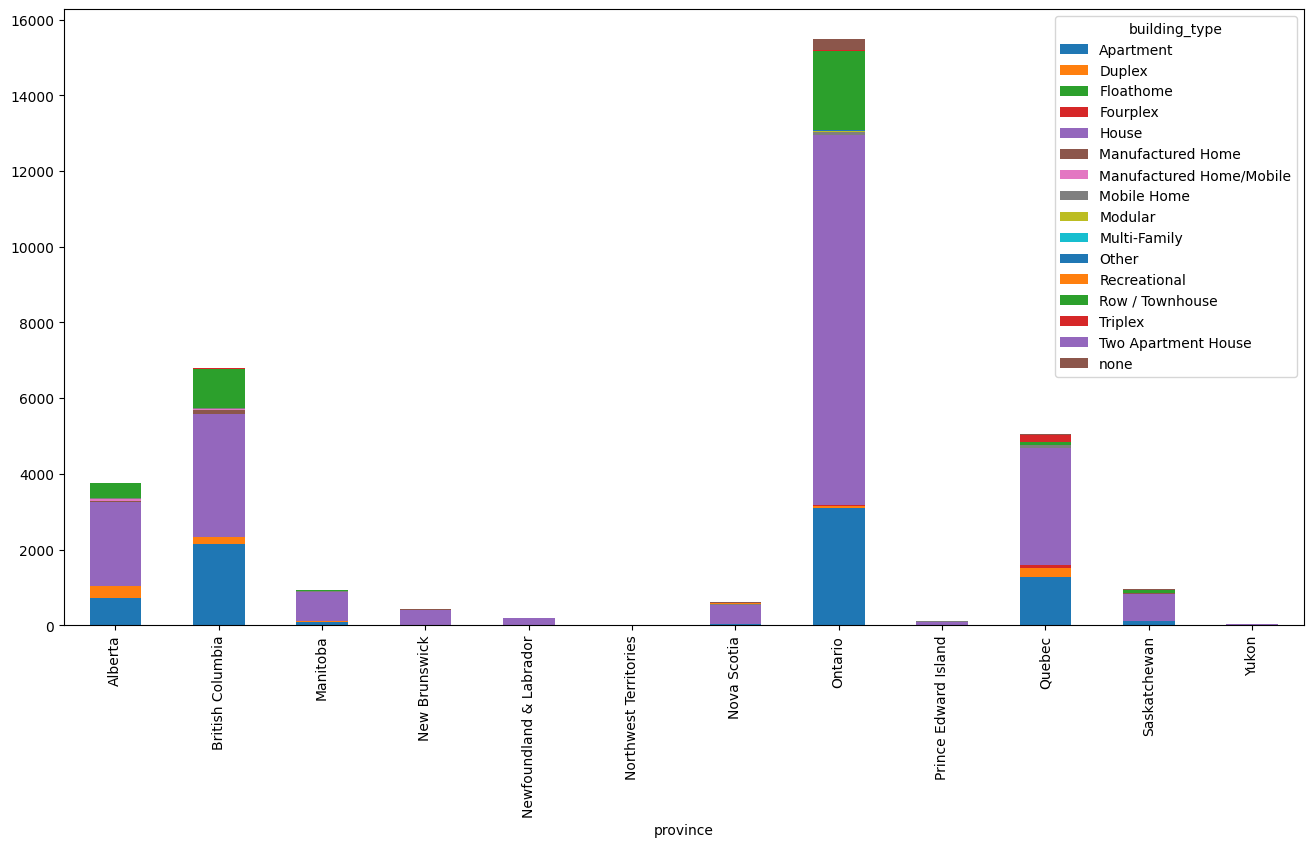

In [37]:
crosstab_building_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

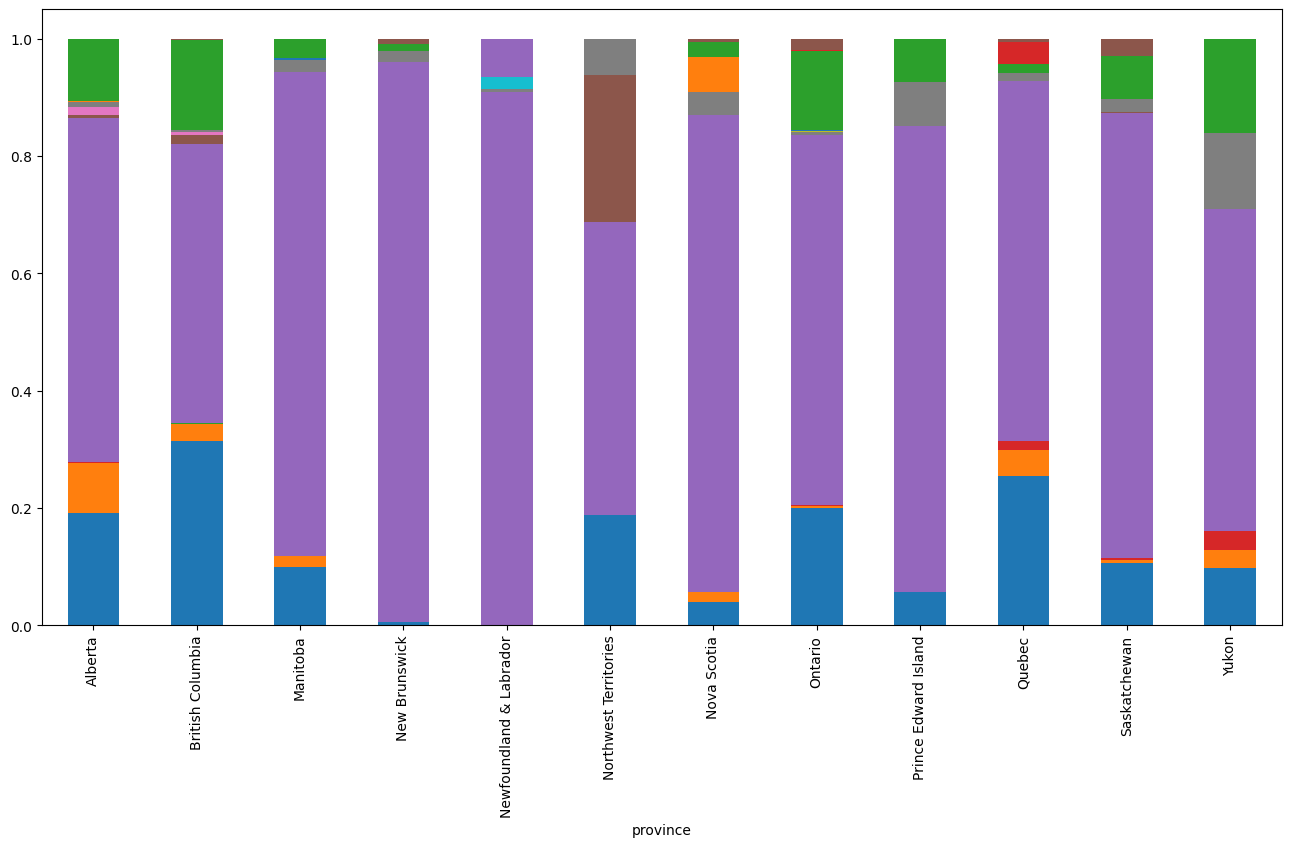

In [38]:
crosstab_building_type_norm = crosstab_building_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_building_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [39]:
crosstab_ownership_type = pd.crosstab(df_sf["province"], df_sf["ownership_type"])
crosstab_ownership_type

ownership_type,Condominium,Condominium/Strata,Cooperative,Freehold,Freehold Condo,Leasehold,Leasehold Condo/Strata,Leasehold/Leased Land,Life Lease,"Other, See Remarks",Shares in Co-operative,Strata,Timeshare/Fractional,Undivided Co-ownership,Unknown,none
province,,,,,,,,,,,,,,,,
Alberta,0,1137,0,2426,0,22,0,0,0,0,0,0,0,0,0,182
British Columbia,0,95,0,3184,0,99,70,13,0,2,7,3241,6,0,15,72
Manitoba,0,0,0,769,152,19,0,0,3,0,0,0,0,0,0,0
New Brunswick,0,9,0,269,0,13,0,0,0,0,0,0,0,0,0,127
Newfoundland & Labrador,0,0,0,181,0,1,0,0,0,0,0,0,0,0,0,3
Northwest Territories,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,13
Nova Scotia,0,35,0,554,0,12,0,0,0,0,0,0,1,1,0,0
Ontario,814,3314,2,10770,0,97,13,0,4,2,10,0,4,2,0,470
Prince Edward Island,0,12,0,92,0,2,0,0,0,0,0,0,0,0,1,0


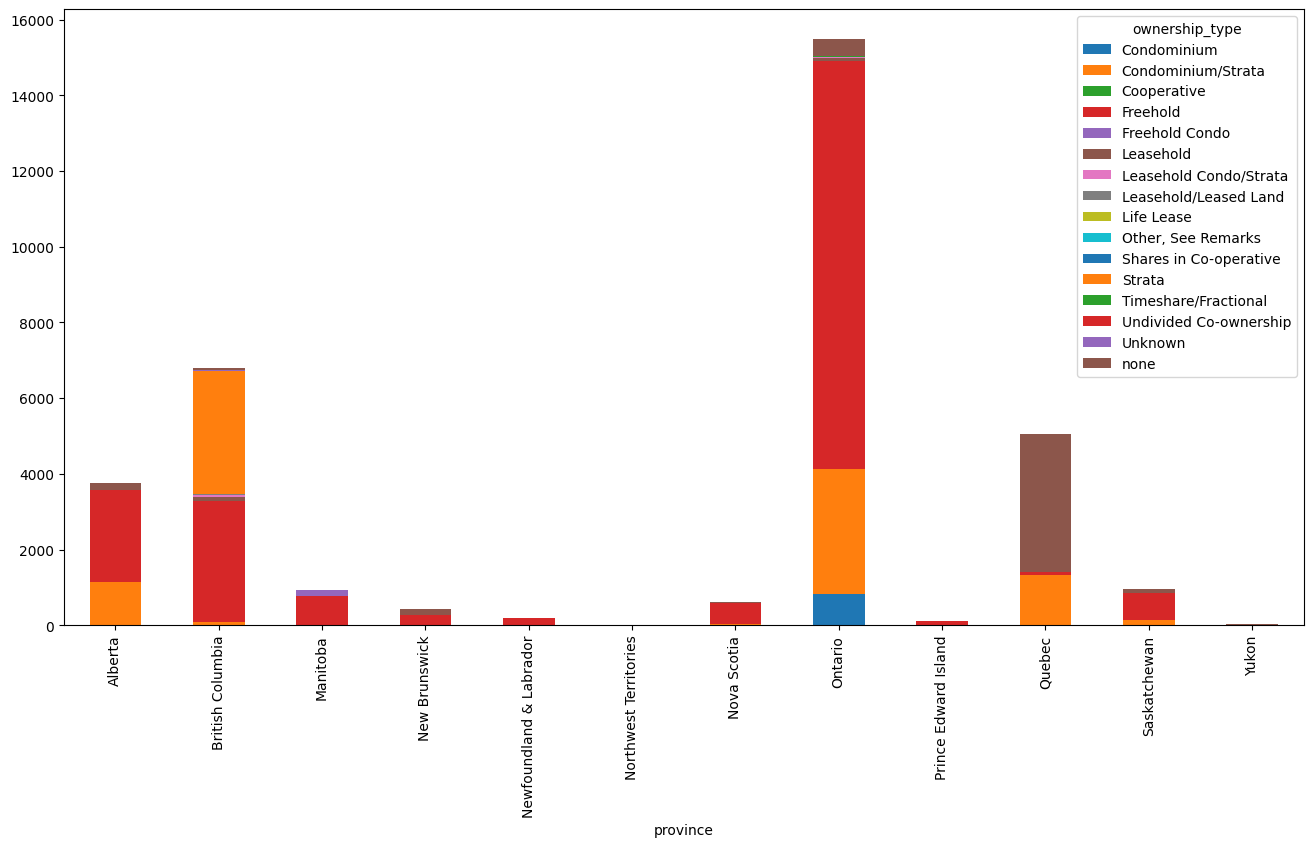

In [40]:
crosstab_ownership_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

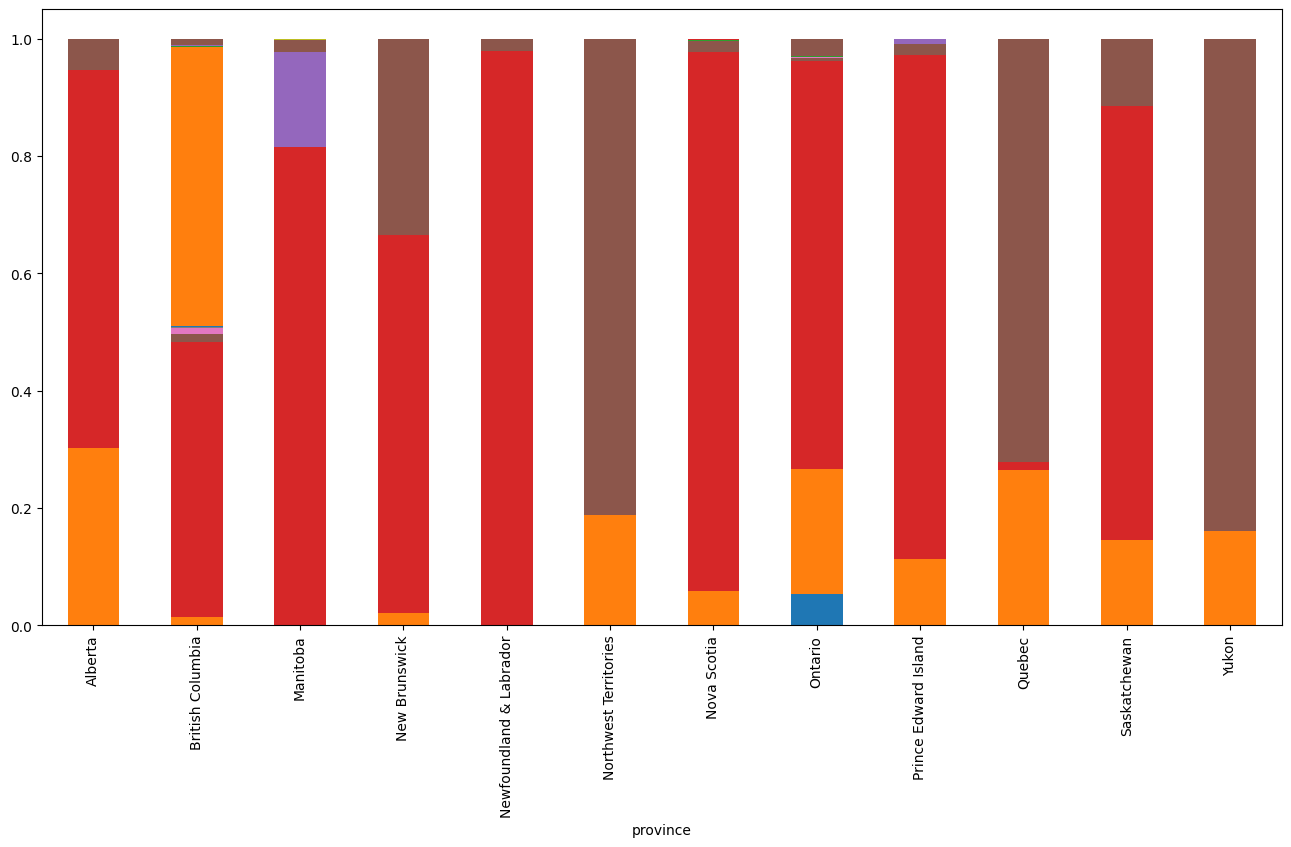

In [41]:
crosstab_ownership_type_norm = crosstab_ownership_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_ownership_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

### Building Type: House, Apartment, Row / Town House

In [42]:
df_app = df_sf[df_sf["building_type"] == "Apartment"]
df_app["ownership_type"].value_counts()

ownership_type
Condominium/Strata        4634
Strata                    1995
Condominium                519
Freehold Condo              92
Undivided Co-ownership      68
Leasehold Condo/Strata      62
none                        35
Freehold                    31
Shares in Co-operative      14
Leasehold                    9
Timeshare/Fractional         7
Life Lease                   4
Cooperative                  1
Unknown                      1
Name: count, dtype: int64

In [43]:
df_dup = df_sf[df_sf["building_type"] == "Duplex"]
df_dup["ownership_type"].value_counts()

ownership_type
Freehold                  377
none                      276
Strata                    136
Condominium/Strata         50
Leasehold                   2
Leasehold Condo/Strata      1
Leasehold/Leased Land       1
Name: count, dtype: int64

In [44]:
crosstab_ot_bt = pd.crosstab(df_sf["ownership_type"], df_sf["building_type"])
crosstab_ot_bt

building_type,Apartment,Duplex,Floathome,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
ownership_type,,,,,,,,,,,,,,,,
Condominium,519,0,0,0,20,0,0,0,0,0,0,0,267,0,0,8
Condominium/Strata,4634,50,0,1,109,0,13,0,0,0,2,1,1228,0,0,45
Cooperative,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Freehold,31,377,0,8,17018,25,64,55,7,4,4,43,1226,4,12,77
Freehold Condo,92,0,0,0,33,0,0,0,0,0,0,0,27,0,0,0
Leasehold,9,2,0,0,93,42,8,87,17,0,0,1,11,0,0,6
Leasehold Condo/Strata,62,1,0,0,0,2,0,0,0,0,0,0,18,0,0,0
Leasehold/Leased Land,0,1,0,0,6,1,0,0,0,0,0,0,5,0,0,0
Life Lease,4,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0


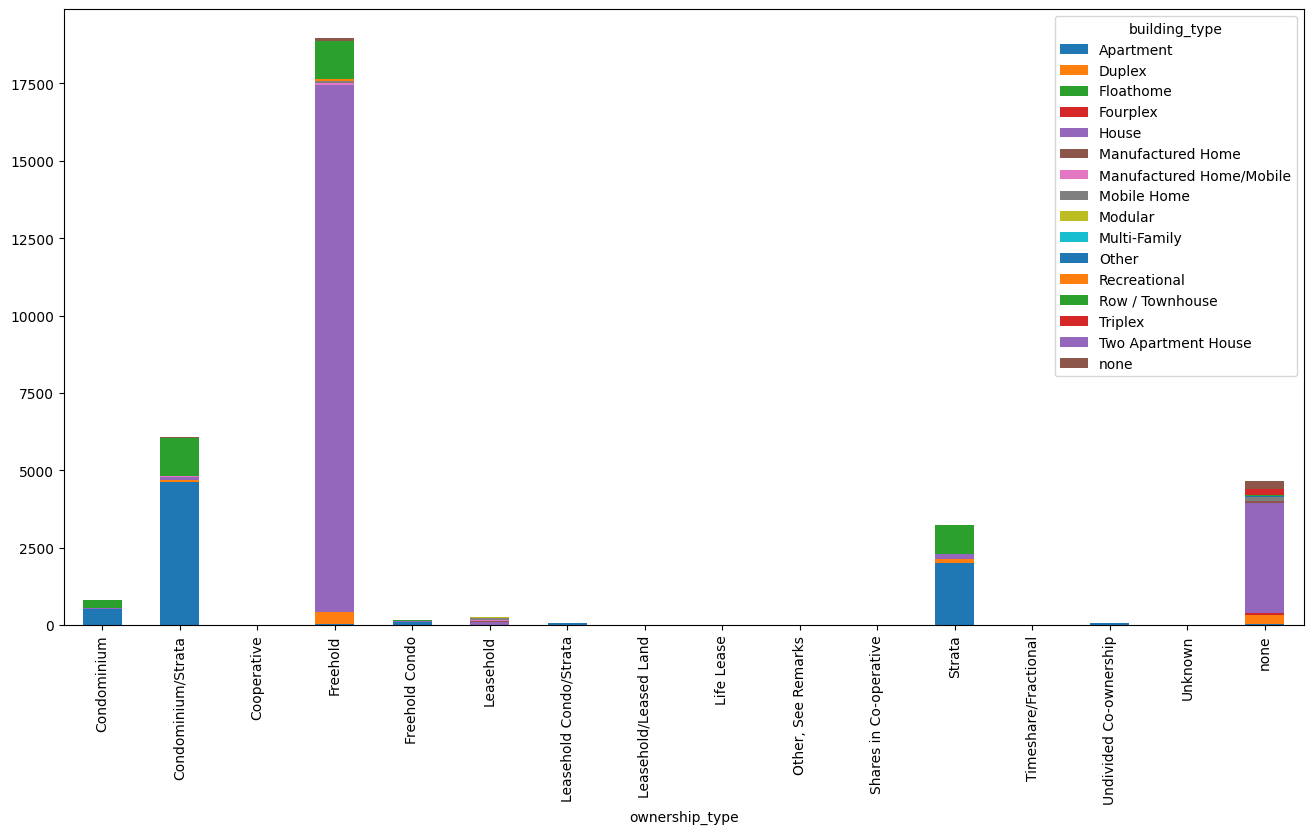

In [45]:
crosstab_ot_bt.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

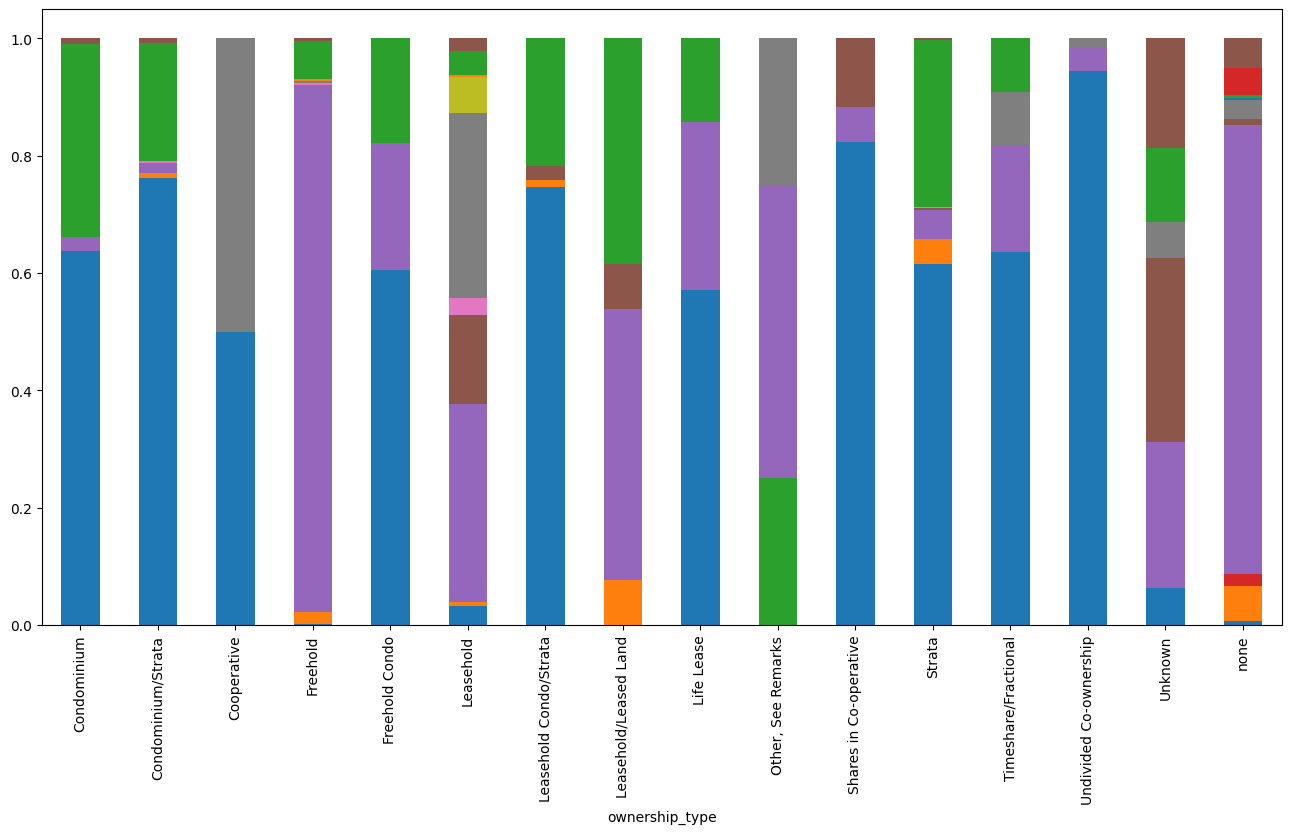

In [46]:
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [47]:
np.round(df_sf[df_sf["building_type"] == "Duplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,843.0,843.0,491.0,843.0,843.0,843.0,8.430000e+02,843.0
mean,26742186.0,3.0,2.0,-102.0,49.0,2.0,6.384856e+17,791920.0
std,14747.0,1.0,1.0,21.0,3.0,3.0,2.759134e+12,599267.0
min,26715038.0,0.0,1.0,-135.0,42.0,0.0,6.384800e+17,74000.0
25%,26729895.0,2.0,2.0,-119.0,46.0,0.0,6.384836e+17,399900.0
50%,26742443.0,3.0,2.0,-113.0,49.0,2.0,6.384853e+17,575000.0
75%,26754710.0,3.0,2.0,-74.0,52.0,4.0,6.384882e+17,975950.0
max,26767392.0,8.0,4.0,-64.0,61.0,32.0,6.384902e+17,3999000.0


In [48]:
np.round(df_sf[df_sf["building_type"] == "Triplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,219.0,219.0,119.0,219.0,219.0,219.0,2.190000e+02,219.0
mean,26743819.0,1.0,2.0,-75.0,46.0,3.0,6.384859e+17,839206.0
std,15451.0,1.0,1.0,6.0,1.0,3.0,2.891202e+12,452014.0
min,26716244.0,1.0,1.0,-123.0,43.0,0.0,6.384802e+17,75000.0
25%,26730892.0,1.0,2.0,-74.0,45.0,0.0,6.384836e+17,564500.0
50%,26744919.0,1.0,2.0,-74.0,46.0,3.0,6.384855e+17,799000.0
75%,26758249.0,1.0,3.0,-73.0,46.0,5.0,6.384889e+17,959500.0
max,26767290.0,6.0,4.0,-65.0,50.0,12.0,6.384901e+17,3395000.0


In [49]:
np.round(df_sf[df_sf["building_type"] == "Fourplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,103.0,103.0,58.0,103.0,103.0,103.0,1.030000e+02,103.0
mean,26742237.0,2.0,2.0,-78.0,46.0,3.0,6.384856e+17,867152.0
std,15063.0,2.0,1.0,13.0,2.0,4.0,2.841539e+12,423098.0
min,26715207.0,1.0,1.0,-135.0,43.0,0.0,6.384801e+17,154900.0
25%,26728964.0,1.0,2.0,-75.0,45.0,0.0,6.384831e+17,562450.0
50%,26743829.0,1.0,2.0,-74.0,46.0,2.0,6.384854e+17,850000.0
75%,26753222.0,2.0,2.0,-73.0,46.0,5.0,6.384881e+17,1179000.0
max,26766808.0,8.0,3.0,-66.0,61.0,16.0,6.384900e+17,2599000.0


In [50]:
np.round(df_sf[df_sf["building_type"] == "Row / Townhouse"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,3736.0,3736.0,2597.0,3736.0,3736.0,3736.0,3.736000e+03,3736.0
mean,26742939.0,3.0,2.0,-95.0,47.0,2.0,6.384857e+17,778673.0
std,15174.0,1.0,1.0,20.0,3.0,1.0,2.867762e+12,391278.0
min,26715035.0,0.0,1.0,-135.0,42.0,0.0,6.384800e+17,1.0
25%,26730227.0,2.0,2.0,-120.0,44.0,1.0,6.384836e+17,539900.0
50%,26743474.0,3.0,2.0,-80.0,45.0,2.0,6.384854e+17,719894.0
75%,26756896.0,3.0,3.0,-79.0,49.0,2.0,6.384888e+17,925000.0
max,26767386.0,7.0,65.0,-63.0,61.0,46.0,6.384902e+17,6499000.0


In [51]:
df_sd = df_sf.replace(["Duplex", "Triplex", "Fourplex"], "Semi-Detached")
df_sd["building_type"].value_counts()

building_type
House                       21011
Apartment                    7472
Row / Townhouse              3736
Semi-Detached                1165
none                          382
Mobile Home                   296
Manufactured Home             129
Manufactured Home/Mobile       88
Recreational                   47
Modular                        24
Other                          20
Two Apartment House            12
Multi-Family                    4
Floathome                       1
Name: count, dtype: int64

In [52]:
# Building Type: House, Apartment, Town House
df_bt = df_sd[(df_sd["building_type"] == "House") | 
              (df_sd["building_type"] == "Apartment") |
              (df_sd["building_type"] == "Semi-Detached") |
              (df_sd["building_type"] == "Row / Townhouse")]
df_bt["building_type"].value_counts()

building_type
House              21011
Apartment           7472
Row / Townhouse     3736
Semi-Detached       1165
Name: count, dtype: int64

In [53]:
df_bt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33384 entries, 0 to 38217
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        33384 non-null  int64  
 1   id_mls                    33384 non-null  object 
 2   bathrooms_total           33384 non-null  int64  
 3   bedrooms                  33384 non-null  object 
 4   stories_total             23073 non-null  float64
 5   size_interior             19563 non-null  object 
 6   building_type             33384 non-null  object 
 7   agency_name               33384 non-null  object 
 8   agency_type               33384 non-null  object 
 9   property_type             33384 non-null  object 
 10  lng                       33384 non-null  float64
 11  lat                       33384 non-null  float64
 12  ownership_type            33384 non-null  object 
 13  ownership_type_group_ids  33384 non-null  object 
 14  land_size  

In [54]:
df_bt["province"].value_counts()

province
Ontario                    15075
British Columbia            6618
Quebec                      4958
Alberta                     3655
Manitoba                     920
Saskatchewan                 908
Nova Scotia                  539
New Brunswick                406
Newfoundland & Labrador      168
Prince Edward Island          99
Yukon                         27
Northwest Territories         11
Name: count, dtype: int64

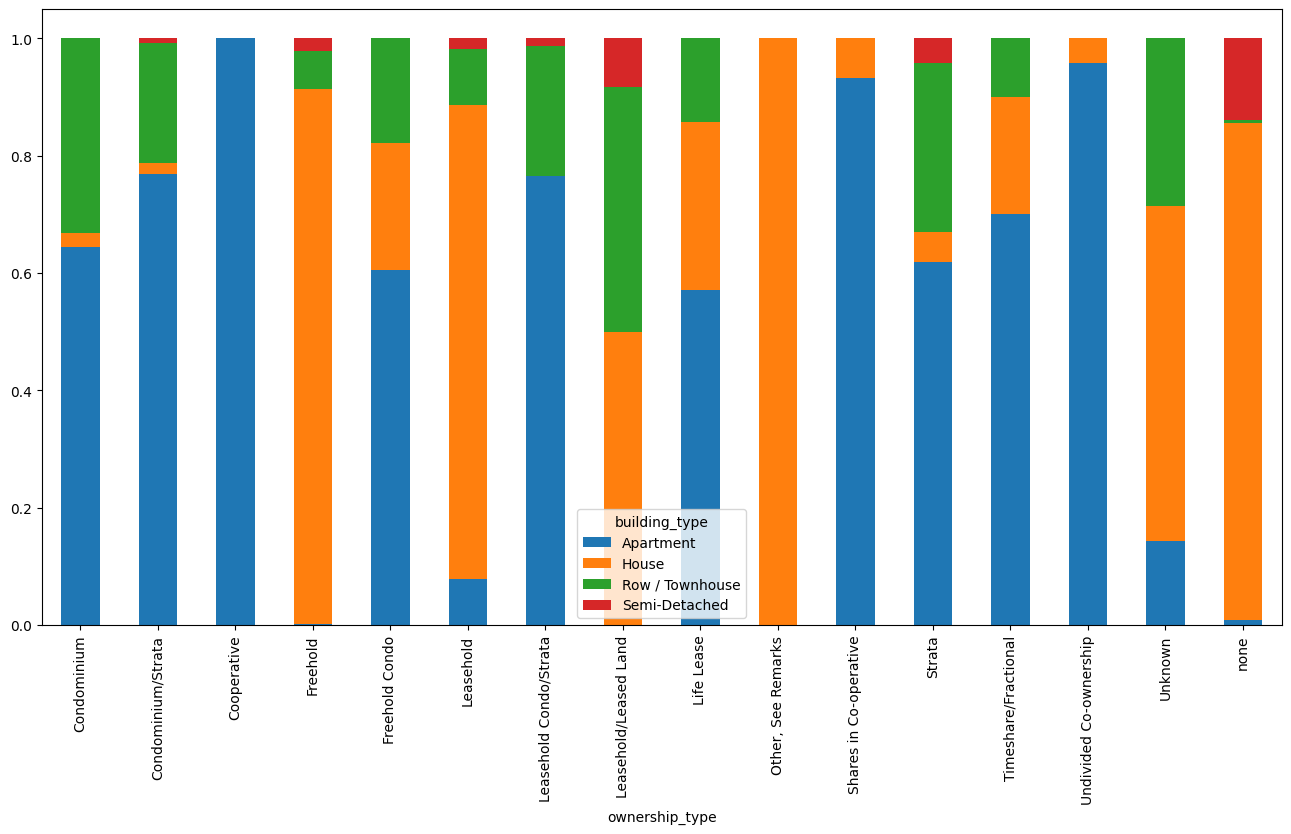

In [55]:
crosstab_ot_bt = pd.crosstab(df_bt["ownership_type"], df_bt["building_type"])
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

### Ownership Type ID: Freehold, Strata / Condo, Other Types

In [56]:
df_bt["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          18664
2          10298
none        4200
4            127
1 2           71
3             10
2 3            7
1 2 3 4        7
Name: count, dtype: int64

In [57]:
df_bt[df_bt["building_type"] == "House"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          17018
none        3556
2            327
4             99
1 2 3 4        4
1 2            3
3              2
2 3            2
Name: count, dtype: int64

In [58]:
df_bt[df_bt["building_type"] == "Apartment"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2          7316
1 2          68
none         36
1            31
4             9
3             7
2 3           4
1 2 3 4       1
Name: count, dtype: int64

In [59]:
df_bt[df_bt["building_type"] == "Semi-Detached"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
none    585
1       389
2       188
4         3
Name: count, dtype: int64

In [60]:
df_bt[df_bt["building_type"] == "Row / Townhouse"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2          2467
1          1226
none         23
4            16
1 2 3 4       2
2 3           1
3             1
Name: count, dtype: int64

In [61]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,18664.0,18664.0,14958.0,18664.0,18664.0,18664.0,1.866400e+04,18664.0
mean,26742505.0,3.0,2.0,-92.0,47.0,3.0,6.384857e+17,1095081.0
std,14881.0,1.0,1.0,19.0,4.0,6.0,2.814728e+12,1372790.0
min,26715030.0,0.0,1.0,-132.0,42.0,0.0,6.384800e+17,1.0
25%,26729953.0,2.0,1.0,-114.0,44.0,0.0,6.384836e+17,549900.0
50%,26742706.0,3.0,2.0,-80.0,45.0,3.0,6.384853e+17,828950.0
75%,26755910.0,4.0,2.0,-79.0,50.0,5.0,6.384886e+17,1299000.0
max,26767394.0,14.0,6.0,-53.0,59.0,624.0,6.384902e+17,124960000.0


In [62]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "none"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,4200.0,4200.0,3714.0,4200.0,4200.0,4200.0,4.200000e+03,4200.0
mean,26742112.0,2.0,2.0,-76.0,46.0,4.0,6.384856e+17,634510.0
std,14820.0,1.0,1.0,11.0,2.0,3.0,2.787655e+12,469187.0
min,26715044.0,0.0,1.0,-135.0,42.0,0.0,6.384800e+17,15000.0
25%,26730077.0,1.0,1.0,-74.0,45.0,2.0,6.384836e+17,369375.0
50%,26741502.0,2.0,2.0,-74.0,46.0,3.0,6.384849e+17,531950.0
75%,26755112.0,2.0,2.0,-73.0,47.0,5.0,6.384882e+17,749925.0
max,26767333.0,15.0,4.0,-53.0,62.0,32.0,6.384901e+17,7950000.0


In [63]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "3"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,10.0,10.0,4.0,10.0,10.0,10.0,1.000000e+01,10.0
mean,26742119.0,2.0,2.0,-105.0,48.0,0.0,6.384859e+17,167190.0
std,18754.0,1.0,1.0,26.0,2.0,1.0,3.397967e+12,133828.0
min,26718462.0,1.0,1.0,-125.0,45.0,0.0,6.384818e+17,55000.0
25%,26724283.0,1.0,1.0,-124.0,45.0,0.0,6.384827e+17,78000.0
50%,26746325.0,2.0,2.0,-124.0,49.0,0.0,6.384864e+17,119000.0
75%,26756506.0,3.0,2.0,-79.0,49.0,0.0,6.384887e+17,226250.0
max,26764260.0,3.0,2.0,-61.0,50.0,2.0,6.384898e+17,479900.0


In [64]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,127.0,127.0,89.0,127.0,127.0,127.0,1.270000e+02,127.0
mean,26744747.0,2.0,1.0,-100.0,48.0,1.0,6.384861e+17,630673.0
std,13982.0,1.0,1.0,20.0,3.0,2.0,2.650484e+12,521925.0
min,26715181.0,0.0,1.0,-125.0,42.0,0.0,6.384801e+17,65000.0
25%,26733832.0,1.0,1.0,-122.0,44.0,0.0,6.384838e+17,292000.0
50%,26746600.0,2.0,1.0,-102.0,49.0,0.0,6.384856e+17,484500.0
75%,26756799.0,3.0,1.0,-81.0,50.0,2.0,6.384888e+17,776500.0
max,26766525.0,6.0,4.0,-54.0,56.0,8.0,6.384899e+17,3199900.0


In [65]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1 2 3 4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,7.0,7.0,1.0,7.0,7.0,7.0,7.000000e+00,7.0
mean,26747720.0,3.0,1.0,-122.0,50.0,1.0,6.384864e+17,2220814.0
std,14840.0,2.0,NaN,3.0,2.0,1.0,2.857020e+12,2026311.0
min,26721395.0,1.0,1.0,-125.0,49.0,0.0,6.384820e+17,159900.0
25%,26741636.0,2.0,1.0,-123.0,49.0,0.0,6.384849e+17,1004900.0
50%,26745857.0,3.0,1.0,-123.0,49.0,2.0,6.384855e+17,1539000.0
75%,26760022.0,5.0,1.0,-123.0,49.0,2.0,6.384890e+17,3294000.0
max,26763473.0,5.0,1.0,-117.0,55.0,2.0,6.384897e+17,5249000.0


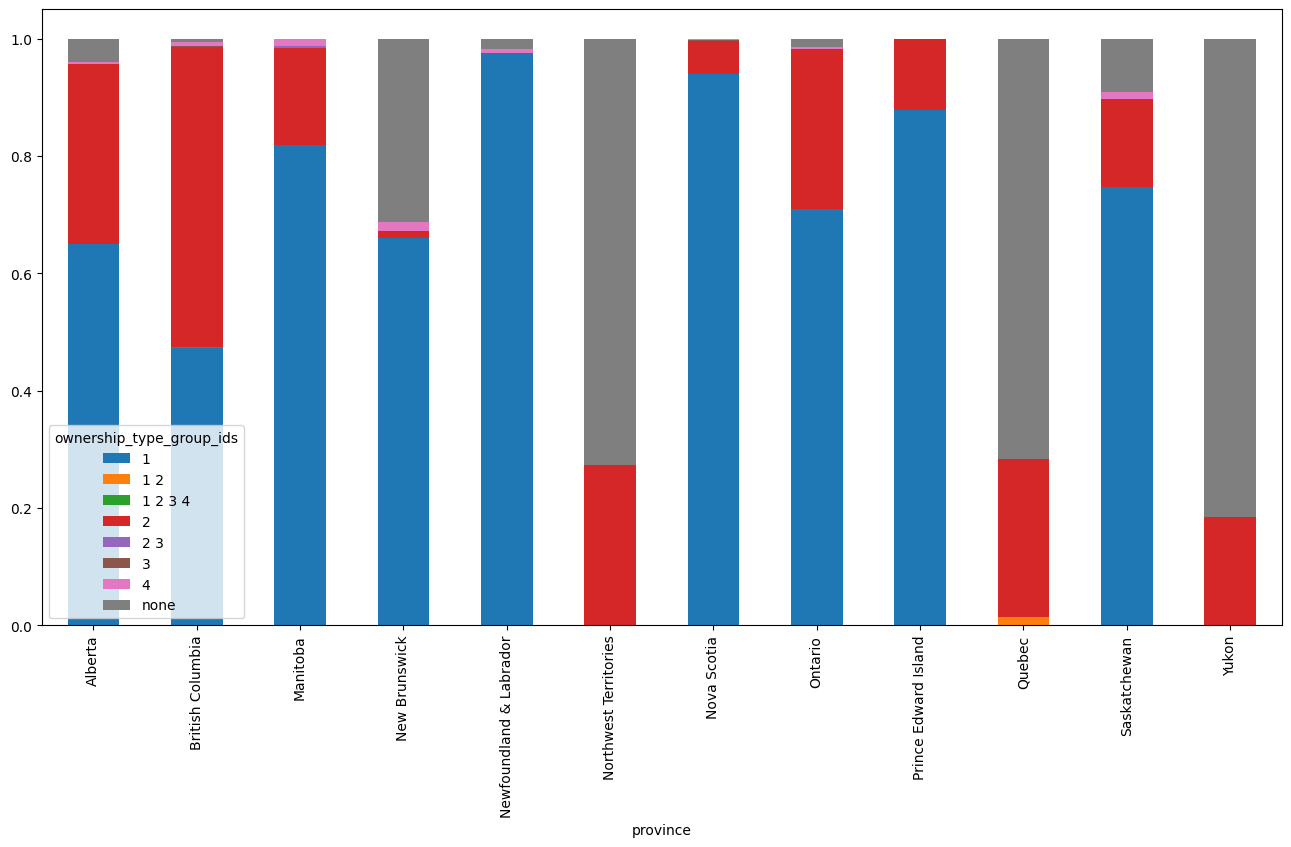

In [66]:
crosstab_oti_province = pd.crosstab(df_bt["province"], df_bt["ownership_type_group_ids"])
crosstab_oti_province_norm = crosstab_oti_province.div(crosstab_oti_province.sum(1), axis=0)
crosstab_oti_province_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

In [67]:
mask_other = ((df_bt["ownership_type_group_ids"] == "1") & (df_bt["ownership_type_group_ids"] == "2"))
df_oti = df_bt.copy(deep=True)
df_oti.loc[mask_other, "ownership_type_group_ids"] = "0"
df_oti["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          18664
2          10298
none        4200
4            127
1 2           71
3             10
2 3            7
1 2 3 4        7
Name: count, dtype: int64

In [68]:
df_oti_new = df_oti[(df_oti["ownership_type_group_ids"] == "1") | 
                    (df_oti["ownership_type_group_ids"] == "2") |
                    (df_oti["ownership_type_group_ids"] == "0")]

df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)
df_oti_new["ownership_type_group_ids"].value_counts()

# 1: Freehold
# 2: Strata / Condo
# 0: Other

C:\Users\Soheil\AppData\Local\Temp\ipykernel_9404\3613108038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)


ownership_type_group_ids
1    18664
2    10298
Name: count, dtype: int64

In [69]:
df_oti_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28962 entries, 0 to 38216
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        28962 non-null  int64  
 1   id_mls                    28962 non-null  object 
 2   bathrooms_total           28962 non-null  int64  
 3   bedrooms                  28962 non-null  object 
 4   stories_total             19198 non-null  float64
 5   size_interior             17737 non-null  object 
 6   building_type             28962 non-null  object 
 7   agency_name               28962 non-null  object 
 8   agency_type               28962 non-null  object 
 9   property_type             28962 non-null  object 
 10  lng                       28962 non-null  float64
 11  lat                       28962 non-null  float64
 12  ownership_type            28962 non-null  object 
 13  ownership_type_group_ids  28962 non-null  int32  
 14  land_size  

In [70]:
df_oti_new["province"].value_counts()

province
Ontario                    14809
British Columbia            6520
Alberta                     3498
Quebec                      1334
Manitoba                     905
Saskatchewan                 815
Nova Scotia                  537
New Brunswick                273
Newfoundland & Labrador      164
Prince Edward Island          99
Yukon                          5
Northwest Territories          3
Name: count, dtype: int64

In [71]:
# DROP UNNECESSARY COLUMNS !!!

## Converting "Bedrooms" to Number

In [72]:
df = df_oti_new

In [73]:
df["bedrooms"].str.contains("\+").value_counts()

bedrooms
False    16864
True     12098
Name: count, dtype: int64

In [74]:
df.shape

(28962, 21)

In [75]:
df[df["bedrooms"].str.contains("\+")].head()

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
1,26765212,24007988,2,2 + 0,NaN,1122.0000,Apartment,THE DAN GEMUS REAL ESTATE TEAM LTD. - 520,Firm,Single Family,...,42.248764,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765212/5840-n...,638489812594830000,N9J0E3,Ontario,524900.0
2,26765207,24008037,2,2 + 0,NaN,1000.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,Single Family,...,42.102268,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765207/90-mur...,638489812565170000,N9V4B9,Ontario,349900.0
5,26765204,24008041,2,2 + 0,NaN,1000.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,Single Family,...,42.102268,Freehold,1,0X,0,https://realtor.ca/real-estate/26765204/90-mur...,638489812557370000,N9V4B9,Ontario,349900.0
6,26764442,24008017,1,2 + 1,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,Single Family,...,42.310196,Freehold,1,30.12X116.95,0,https://realtor.ca/real-estate/26764442/1347-l...,638489776700600000,N8Y2J2,Ontario,349000.0
8,26764438,24008024,1,3 + 0,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,Single Family,...,42.311678,Freehold,1,33X125,0,https://realtor.ca/real-estate/26764438/588-ca...,638489776684870000,N9A5B4,Ontario,359900.0


In [76]:
bed_plus = df[df["bedrooms"].str.contains("\+")]

In [77]:
bed_plus
bed_extra = [bed.split()[-1] for bed in bed_plus["bedrooms"]]

In [78]:
pd.DataFrame(bed_extra).value_counts()

0
0    5418
1    4571
2    1793
3     279
4      32
5       5
Name: count, dtype: int64

In [79]:
bedrooms_extra = []

for bedroom in df["bedrooms"]:
    splited_cell = bedroom.split()
    if len(splited_cell) > 1:
        bedrooms_extra.append(splited_cell[-1])
    else:
        bedrooms_extra.append("0")

In [80]:
len(bedrooms_extra)

28962

In [81]:
bedrooms_extra[:20]

['0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '2',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '5',
 '0',
 '0',
 '1',
 '0']

In [82]:
df.insert(2, "bedrooms_extra", bedrooms_extra)

In [83]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26766434,X8244966,0,4,5,2.0,NaN,House,CENTURY 21 PREMIUM REALTY,Firm,...,42.101378,Freehold,1,60.01 x 127.95 FT,8,https://realtor.ca/real-estate/26766434/311-be...,638489934074770000,N9V0G7,Ontario,999990.0
1,26765212,24007988,0,2,2 + 0,NaN,1122.0000,Apartment,THE DAN GEMUS REAL ESTATE TEAM LTD. - 520,Firm,...,42.248764,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765212/5840-n...,638489812594830000,N9J0E3,Ontario,524900.0
2,26765207,24008037,0,2,2 + 0,NaN,1000.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765207/90-mur...,638489812565170000,N9V4B9,Ontario,349900.0
5,26765204,24008041,0,2,2 + 0,NaN,1000.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Freehold,1,0X,0,https://realtor.ca/real-estate/26765204/90-mur...,638489812557370000,N9V4B9,Ontario,349900.0
6,26764442,24008017,1,1,2 + 1,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.310196,Freehold,1,30.12X116.95,0,https://realtor.ca/real-estate/26764442/1347-l...,638489776700600000,N8Y2J2,Ontario,349000.0
8,26764438,24008024,0,1,3 + 0,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.311678,Freehold,1,33X125,0,https://realtor.ca/real-estate/26764438/588-ca...,638489776684870000,N9A5B4,Ontario,359900.0
9,26762962,24007990,0,3,2 + 0,NaN,2450.0000,Apartment,LC PLATINUM REALTY INC. - 525,Firm,...,42.316242,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26762962/1225-r...,638489668557130000,N9A0A2,Ontario,1238000.0
11,26762960,24007993,0,6,5 + 0,2.0,5204.0000,House,RE/MAX CARE REALTY - 828,Firm,...,42.212191,Freehold,1,200X400,0,https://realtor.ca/real-estate/26762960/7621-d...,638489668544600000,N9A6Z6,Ontario,2800000.0
12,26762259,24007969,2,2,3 + 2,1.0,NaN,House,RE/MAX CARE REALTY - 828,Firm,...,42.266694,Freehold,1,60X117.24,0,https://realtor.ca/real-estate/26762259/3108-d...,638489632499730000,N9E2N4,Ontario,599900.0
13,26762258,24007977,0,4,4 + 0,2.0,3040.0000,House,JUMP REALTY INC.,Firm,...,42.136800,Freehold,1,60.93XIRREG,0,https://realtor.ca/real-estate/26762258/310-be...,638489632480970000,N9V0A8,Ontario,1369900.0


In [84]:
df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]

C:\Users\Soheil\AppData\Local\Temp\ipykernel_9404\2251018251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28962 entries, 0 to 38216
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        28962 non-null  int64  
 1   id_mls                    28962 non-null  object 
 2   bedrooms_extra            28962 non-null  object 
 3   bathrooms_total           28962 non-null  int64  
 4   bedrooms                  28962 non-null  object 
 5   stories_total             19198 non-null  float64
 6   size_interior             17737 non-null  object 
 7   building_type             28962 non-null  object 
 8   agency_name               28962 non-null  object 
 9   agency_type               28962 non-null  object 
 10  property_type             28962 non-null  object 
 11  lng                       28962 non-null  float64
 12  lat                       28962 non-null  float64
 13  ownership_type            28962 non-null  object 
 14  ownership_t

In [86]:
df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)

C:\Users\Soheil\AppData\Local\Temp\ipykernel_9404\1101565595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)


In [87]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26766434,X8244966,0,4,5,2.0,NaN,House,CENTURY 21 PREMIUM REALTY,Firm,...,42.101378,Freehold,1,60.01 x 127.95 FT,8,https://realtor.ca/real-estate/26766434/311-be...,638489934074770000,N9V0G7,Ontario,999990.0
1,26765212,24007988,0,2,2,NaN,1122.0000,Apartment,THE DAN GEMUS REAL ESTATE TEAM LTD. - 520,Firm,...,42.248764,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765212/5840-n...,638489812594830000,N9J0E3,Ontario,524900.0
2,26765207,24008037,0,2,2,NaN,1000.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765207/90-mur...,638489812565170000,N9V4B9,Ontario,349900.0
5,26765204,24008041,0,2,2,NaN,1000.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Freehold,1,0X,0,https://realtor.ca/real-estate/26765204/90-mur...,638489812557370000,N9V4B9,Ontario,349900.0
6,26764442,24008017,1,1,2,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.310196,Freehold,1,30.12X116.95,0,https://realtor.ca/real-estate/26764442/1347-l...,638489776700600000,N8Y2J2,Ontario,349000.0
8,26764438,24008024,0,1,3,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.311678,Freehold,1,33X125,0,https://realtor.ca/real-estate/26764438/588-ca...,638489776684870000,N9A5B4,Ontario,359900.0
9,26762962,24007990,0,3,2,NaN,2450.0000,Apartment,LC PLATINUM REALTY INC. - 525,Firm,...,42.316242,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26762962/1225-r...,638489668557130000,N9A0A2,Ontario,1238000.0
11,26762960,24007993,0,6,5,2.0,5204.0000,House,RE/MAX CARE REALTY - 828,Firm,...,42.212191,Freehold,1,200X400,0,https://realtor.ca/real-estate/26762960/7621-d...,638489668544600000,N9A6Z6,Ontario,2800000.0
12,26762259,24007969,2,2,3,1.0,NaN,House,RE/MAX CARE REALTY - 828,Firm,...,42.266694,Freehold,1,60X117.24,0,https://realtor.ca/real-estate/26762259/3108-d...,638489632499730000,N9E2N4,Ontario,599900.0
13,26762258,24007977,0,4,4,2.0,3040.0000,House,JUMP REALTY INC.,Firm,...,42.136800,Freehold,1,60.93XIRREG,0,https://realtor.ca/real-estate/26762258/310-be...,638489632480970000,N9V0A8,Ontario,1369900.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28962 entries, 0 to 38216
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        28962 non-null  int64  
 1   id_mls                    28962 non-null  object 
 2   bedrooms_extra            28962 non-null  int32  
 3   bathrooms_total           28962 non-null  int64  
 4   bedrooms                  28962 non-null  int32  
 5   stories_total             19198 non-null  float64
 6   size_interior             17737 non-null  object 
 7   building_type             28962 non-null  object 
 8   agency_name               28962 non-null  object 
 9   agency_type               28962 non-null  object 
 10  property_type             28962 non-null  object 
 11  lng                       28962 non-null  float64
 12  lat                       28962 non-null  float64
 13  ownership_type            28962 non-null  object 
 14  ownership_t

## Handling Storeys

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28962 entries, 0 to 38216
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        28962 non-null  int64  
 1   id_mls                    28962 non-null  object 
 2   bedrooms_extra            28962 non-null  int32  
 3   bathrooms_total           28962 non-null  int64  
 4   bedrooms                  28962 non-null  int32  
 5   stories_total             19198 non-null  float64
 6   size_interior             17737 non-null  object 
 7   building_type             28962 non-null  object 
 8   agency_name               28962 non-null  object 
 9   agency_type               28962 non-null  object 
 10  property_type             28962 non-null  object 
 11  lng                       28962 non-null  float64
 12  lat                       28962 non-null  float64
 13  ownership_type            28962 non-null  object 
 14  ownership_t

In [90]:
df.head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26766434,X8244966,0,4,5,2.0,NaN,House,CENTURY 21 PREMIUM REALTY,Firm,...,42.101378,Freehold,1,60.01 x 127.95 FT,8,https://realtor.ca/real-estate/26766434/311-be...,638489934074770000,N9V0G7,Ontario,999990.0
1,26765212,24007988,0,2,2,NaN,1122.0000,Apartment,THE DAN GEMUS REAL ESTATE TEAM LTD. - 520,Firm,...,42.248764,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765212/5840-n...,638489812594830000,N9J0E3,Ontario,524900.0
2,26765207,24008037,0,2,2,NaN,1000.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765207/90-mur...,638489812565170000,N9V4B9,Ontario,349900.0
5,26765204,24008041,0,2,2,NaN,1000.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Freehold,1,0X,0,https://realtor.ca/real-estate/26765204/90-mur...,638489812557370000,N9V4B9,Ontario,349900.0
6,26764442,24008017,1,1,2,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.310196,Freehold,1,30.12X116.95,0,https://realtor.ca/real-estate/26764442/1347-l...,638489776700600000,N8Y2J2,Ontario,349000.0


In [91]:
df["stories_total"].value_counts().sort_index()

stories_total
1.00      6805
1.50       754
1.75        47
2.00      8734
2.50       216
          ... 
127.00       1
136.00       1
162.00       1
169.00       1
350.00       1
Name: count, Length: 63, dtype: int64

In [92]:
df["stories_total"].value_counts().sort_index().head(20)

stories_total
1.00     6805
1.50      754
1.75       47
2.00     8734
2.50      216
3.00     1546
3.50        1
4.00      437
5.00       78
6.00      133
7.00       35
8.00       51
9.00       24
10.00      21
11.00      13
12.00      24
13.00       5
14.00      18
15.00      24
16.00      21
Name: count, dtype: int64

In [93]:
df[df["stories_total"] == 0].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [94]:
df[df["stories_total"] == 0]["building_type"].value_counts()

Series([], Name: count, dtype: int64)

In [95]:
df[df["stories_total"] == 0]["page_url"]

Series([], Name: page_url, dtype: object)

In [96]:
df[df["stories_total"].isna()]["building_type"].value_counts()

building_type
Apartment          4716
House              3720
Row / Townhouse    1119
Semi-Detached       209
Name: count, dtype: int64

In [97]:
df[df["stories_total"].isna()]["page_url"]

1        https://realtor.ca/real-estate/26765212/5840-n...
2        https://realtor.ca/real-estate/26765207/90-mur...
5        https://realtor.ca/real-estate/26765204/90-mur...
9        https://realtor.ca/real-estate/26762962/1225-r...
17       https://realtor.ca/real-estate/26762253/540-ou...
                               ...                        
38187    https://realtor.ca/real-estate/26740535/38-25-...
38195    https://realtor.ca/real-estate/26718038/51-67-...
38207    https://realtor.ca/real-estate/26746271/405-56...
38210    https://realtor.ca/real-estate/26738154/300-18...
38216    https://realtor.ca/real-estate/26721093/1201-5...
Name: page_url, Length: 9764, dtype: object

In [98]:
# if story is 0 or none, make it 1
df_storey = df.copy(deep=True)
df_storey["stories_total"] = df_storey["stories_total"].replace(0, 1)
df_storey["stories_total"] = df_storey["stories_total"].fillna(1)
df_storey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28962 entries, 0 to 38216
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        28962 non-null  int64  
 1   id_mls                    28962 non-null  object 
 2   bedrooms_extra            28962 non-null  int32  
 3   bathrooms_total           28962 non-null  int64  
 4   bedrooms                  28962 non-null  int32  
 5   stories_total             28962 non-null  float64
 6   size_interior             17737 non-null  object 
 7   building_type             28962 non-null  object 
 8   agency_name               28962 non-null  object 
 9   agency_type               28962 non-null  object 
 10  property_type             28962 non-null  object 
 11  lng                       28962 non-null  float64
 12  lat                       28962 non-null  float64
 13  ownership_type            28962 non-null  object 
 14  ownership_t

In [99]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     16569
2.00      8734
3.00      1546
1.50       754
4.00       437
2.50       216
6.00       133
5.00        78
8.00        51
1.75        47
7.00        35
15.00       24
9.00        24
12.00       24
10.00       21
16.00       21
17.00       20
14.00       18
38.00       17
11.00       13
Name: count, dtype: int64

In [100]:
df_storey[df_storey["stories_total"] == 3]["page_url"]

106      https://realtor.ca/real-estate/26736056/528-ca...
643      https://realtor.ca/real-estate/26765792/76-35-...
656      https://realtor.ca/real-estate/26765058/35-wat...
743      https://realtor.ca/real-estate/26760531/14-374...
955      https://realtor.ca/real-estate/26745790/20-reg...
                               ...                        
38025    https://realtor.ca/real-estate/26726198/162-10...
38064    https://realtor.ca/real-estate/26763395/50-400...
38079    https://realtor.ca/real-estate/26752791/102-12...
38149    https://realtor.ca/real-estate/26716759/111-40...
38155    https://realtor.ca/real-estate/26757672/5615-a...
Name: page_url, Length: 1546, dtype: object

In [101]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["province"].value_counts()

province
Quebec                  997
Alberta                 432
British Columbia        258
Ontario                  91
Nova Scotia               4
Prince Edward Island      2
Saskatchewan              1
Name: count, dtype: int64

In [102]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["page_url"]

888      https://realtor.ca/real-estate/26750813/1919-t...
1338     https://realtor.ca/real-estate/26715240/3200-s...
1396     https://realtor.ca/real-estate/26751776/1-lame...
1436     https://realtor.ca/real-estate/26742850/615-ne...
2216     https://realtor.ca/real-estate/26734477/45-st-...
                               ...                        
38089    https://realtor.ca/real-estate/26749635/210-99...
38125    https://realtor.ca/real-estate/26731797/1413-2...
38127    https://realtor.ca/real-estate/26728565/2203-9...
38136    https://realtor.ca/real-estate/26721837/3-7-cl...
38142    https://realtor.ca/real-estate/26718375/419-10...
Name: page_url, Length: 1785, dtype: object

In [103]:
mask_apt_storey = (df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)
mask_apt_storey

0        False
1        False
2        False
5        False
6        False
         ...  
38187    False
38195    False
38207    False
38210    False
38216    False
Length: 28962, dtype: bool

In [104]:
~mask_apt_storey

0        True
1        True
2        True
5        True
6        True
         ... 
38187    True
38195    True
38207    True
38210    True
38216    True
Length: 28962, dtype: bool

In [105]:
df_storey = df_storey[~mask_apt_storey] # drop apartments with storey other than 1

In [106]:
# df_storey.loc[df_storey["building_type"] == "Apartment", "stories_total"] = 1

In [107]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     16569
2.00      8544
3.00      1026
1.50       754
2.50       216
1.75        47
4.00        16
5.00         3
65.00        1
3.50         1
Name: count, dtype: int64

In [108]:
df_storey["stories_total"].unique()

array([ 2.  ,  1.  ,  1.75,  2.5 ,  1.5 ,  3.  ,  4.  , 65.  ,  5.  ,
        3.5 ])

In [109]:
df = df_storey

## Handling Interior Size (Phase 1)

### First Looks

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27177 entries, 0 to 38216
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        27177 non-null  int64  
 1   id_mls                    27177 non-null  object 
 2   bedrooms_extra            27177 non-null  int32  
 3   bathrooms_total           27177 non-null  int64  
 4   bedrooms                  27177 non-null  int32  
 5   stories_total             27177 non-null  float64
 6   size_interior             16036 non-null  object 
 7   building_type             27177 non-null  object 
 8   agency_name               27177 non-null  object 
 9   agency_type               27177 non-null  object 
 10  property_type             27177 non-null  object 
 11  lng                       27177 non-null  float64
 12  lat                       27177 non-null  float64
 13  ownership_type            27177 non-null  object 
 14  ownership_t

In [111]:
df["size_interior"].value_counts()

size_interior
1040 sqft        37
1500.0000        32
1200 sqft        32
1100.0000        31
900 sqft         27
                 ..
597 sqft          1
1927 sqft         1
703 sqft          1
2975 sqft         1
12744.47 sqft     1
Name: count, Length: 7805, dtype: int64

In [112]:
df[df["size_interior"].notna()]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
1,26765212,24007988,0,2,2,1.0,1122.0000,Apartment,THE DAN GEMUS REAL ESTATE TEAM LTD. - 520,Firm,...,42.248764,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765212/5840-n...,638489812594830000,N9J0E3,Ontario,524900.0
2,26765207,24008037,0,2,2,1.0,1000.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765207/90-mur...,638489812565170000,N9V4B9,Ontario,349900.0
5,26765204,24008041,0,2,2,1.0,1000.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Freehold,1,0X,0,https://realtor.ca/real-estate/26765204/90-mur...,638489812557370000,N9V4B9,Ontario,349900.0
9,26762962,24007990,0,3,2,1.0,2450.0000,Apartment,LC PLATINUM REALTY INC. - 525,Firm,...,42.316242,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26762962/1225-r...,638489668557130000,N9A0A2,Ontario,1238000.0
11,26762960,24007993,0,6,5,2.0,5204.0000,House,RE/MAX CARE REALTY - 828,Firm,...,42.212191,Freehold,1,200X400,0,https://realtor.ca/real-estate/26762960/7621-d...,638489668544600000,N9A6Z6,Ontario,2800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38187,26740535,15533,0,2,3,1.0,1744 sqft,Row / Townhouse,COLDWELL BANKER REDWOOD REALTY,Firm,...,60.775013,Condominium/Strata,2,1065 sqft,0,https://realtor.ca/real-estate/26740535/38-25-...,638484736922030000,Y1A4A2,Yukon,399800.0
38195,26718038,15521,0,2,2,1.0,935 sqft,Semi-Detached,2% Realty Midnight Sun,Firm,...,60.755640,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26718038/51-67-...,638481382741870000,Y1A0E2,Yukon,347900.0
38207,26746271,5754,0,1,2,1.0,831 sqft,Apartment,RE/MAX North of 60,Firm,...,62.447925,Condominium/Strata,2,1,0,https://realtor.ca/real-estate/26746271/405-56...,638485552463070000,NaN,Northwest Territories,249900.0
38210,26738154,5751,0,1,2,1.0,965 sqft,Apartment,COLDWELL BANKER NBS,Firm,...,62.465755,Condominium/Strata,2,956,0,https://realtor.ca/real-estate/26738154/300-18...,638484557881900000,NaN,Northwest Territories,399900.0


In [113]:
df[(df["province"]=="Ontario") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
1,26765212,24007988,0,2,2,1.0,1122.0000,Apartment,THE DAN GEMUS REAL ESTATE TEAM LTD. - 520,Firm,...,42.248764,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765212/5840-n...,638489812594830000,N9J0E3,Ontario,524900.0
2,26765207,24008037,0,2,2,1.0,1000.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765207/90-mur...,638489812565170000,N9V4B9,Ontario,349900.0
5,26765204,24008041,0,2,2,1.0,1000.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Freehold,1,0X,0,https://realtor.ca/real-estate/26765204/90-mur...,638489812557370000,N9V4B9,Ontario,349900.0
9,26762962,24007990,0,3,2,1.0,2450.0000,Apartment,LC PLATINUM REALTY INC. - 525,Firm,...,42.316242,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26762962/1225-r...,638489668557130000,N9A0A2,Ontario,1238000.0
11,26762960,24007993,0,6,5,2.0,5204.0000,House,RE/MAX CARE REALTY - 828,Firm,...,42.212191,Freehold,1,200X400,0,https://realtor.ca/real-estate/26762960/7621-d...,638489668544600000,N9A6Z6,Ontario,2800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24567,26756325,TB240870,0,2,2,1.0,1215.0000,Apartment,ROYAL LEPAGE LANNON REALTY,Firm,...,48.441356,Condominium,2,under 1/2 acre,0,https://realtor.ca/real-estate/26756325/unit-3...,638488722948300000,P7A5R3,Ontario,624900.0
24572,26750774,TB240850,0,2,3,1.0,1175.0000,Apartment,ROYAL LEPAGE LANNON REALTY,Firm,...,48.436913,Condominium,2,under 1/2 acre,0,https://realtor.ca/real-estate/26750774/unit-3...,638487895401230000,P7B1B8,Ontario,399900.0
24610,26716932,40567546,2,2,3,1.0,2080.0000,House,PG Direct Realty Ltd.,Firm,...,48.348100,Freehold,1,under 1/2 acre,6,https://realtor.ca/real-estate/26716932/103-de...,638480392498330000,P0S1B0,Ontario,350000.0
31742,26756294,40571970,1,3,4,3.0,2250.0000,House,"POINT59 REALTY, BROKERAGE",Firm,...,49.199300,Freehold,1,1/2 - 1.99 acres,5,https://realtor.ca/real-estate/26756294/61-kak...,638488716007530000,P0X1K0,Ontario,1200000.0


In [114]:
df[(df["province"]=="Alberta") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
23473,26748382,A2120241,1,4,3,2.0,1669.05 sqft,House,Premiere Realty Direct,Firm,...,47.411814,Freehold,1,"319.91 m2|0-4,050 sqft",4,https://realtor.ca/real-estate/26748382/124-em...,638486301125200000,T4C3A8,Alberta,639900.0
30591,26761279,A2122263,0,3,3,2.0,1994 sqft,House,Century 21 Foothills South Real Estate,Firm,...,49.567337,Freehold,1,"6000 sqft|4,051 - 7,250 sqft",3,https://realtor.ca/real-estate/26761279/1121-2...,638489212522430000,T0K1C0,Alberta,600000.0
30594,26749604,A2122897,0,4,4,2.0,3699 sqft,House,SUTTON GROUP-LETHBRIDGE CROWSNEST PASS BRANCH,Firm,...,49.643782,Freehold,1,3.14 ac|2 - 4.99 acres,0,https://realtor.ca/real-estate/26749604/8106-2...,638487202501900000,T0K0M0,Alberta,875000.0
30595,26749554,A2120790,0,1,3,1.0,1145 sqft,House,Real Broker,Firm,...,49.638370,Freehold,1,"7722 sqft|7,251 - 10,889 sqft",3,https://realtor.ca/real-estate/26749554/2318-7...,638487195151200000,T0K0M0,Alberta,415000.0
30598,26741634,A2122250,0,1,2,1.0,805.56 sqft,House,eXp Realty of Canada,Firm,...,49.634300,Freehold,1,"3000 sqft|0-4,050 sqft",2,https://realtor.ca/real-estate/26741634/7046-1...,638484898535570000,T0K0M0,Alberta,319000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38163,26749139,A2122631,2,2,3,1.0,1160 sqft,House,M&M Real Estate,Firm,...,58.519282,Freehold,1,"791.95 m2|7,251 - 10,889 sqft",4,https://realtor.ca/real-estate/26749139/49-bea...,638486693994570000,T0H1Z0,Alberta,325000.0
38164,26741454,A2122377,0,2,3,2.0,1116 sqft,Row / Townhouse,M&M Real Estate,Firm,...,58.522062,Freehold,1,"250.33 m2|0-4,050 sqft",2,https://realtor.ca/real-estate/26741454/10340-...,638484856882400000,T0H1Z0,Alberta,99900.0
38166,26757431,A2123226,0,2,3,1.0,12744.47 sqft,House,RE/MAX Grande Prairie,Firm,...,58.192065,Freehold,1,"778 m2|7,251 - 10,889 sqft",6,https://realtor.ca/real-estate/26757431/11004-...,638488820464130000,T0H2H0,Alberta,345000.0
38168,26748747,A2121689,0,1,3,1.0,936 sqft,House,M&M Real Estate,Firm,...,58.442852,Freehold,1,4.13 ac|2 - 4.99 acres,6,https://realtor.ca/real-estate/26748747/13576-...,638486405926730000,T0H1N0,Alberta,189000.0


In [115]:
df[(df["province"]=="Quebec") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
15939,26766612,18887428,0,1,2,1.0,1180.8 sqft,Apartment,VIA CAPITALE DIAMANT,Firm,...,45.410139,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26766612/60-rue...,638489961962100000,J9J0Y3,Quebec,349900.0
16137,26759451,26833425,0,2,3,1.0,2951.46 sqft,Row / Townhouse,RE/MAX DIRECT INC. - Gatineau,Firm,...,45.419804,Condominium/Strata,2,384.99 m2,2,https://realtor.ca/real-estate/26759451/19-rue...,638488955304970000,J9A1S5,Quebec,449900.0
16240,26755248,18756059,0,1,2,1.0,101 m2,Apartment,EXP AGENCE IMMOBILIÈRE,Firm,...,45.384322,Condominium/Strata,2,1959.03 sqft,1,https://realtor.ca/real-estate/26755248/164-ch...,638488270460900000,J9H0G9,Quebec,329900.0
16242,26755115,14367833,0,1,3,1.0,935 sqft,Apartment,RE/MAX VISION - Hull,Firm,...,45.473666,Condominium/Strata,2,1662.01 sqft,0,https://realtor.ca/real-estate/26755115/11-rue...,638488233222470000,J8Z3H5,Quebec,309900.0
16397,26747113,25604293,0,1,2,1.0,1021.5 sqft,Apartment,RE/MAX VISION,Firm,...,45.436891,Condominium/Strata,2,196.47 m2,1,https://realtor.ca/real-estate/26747113/143-bo...,638485641120900000,J9J1G9,Quebec,309000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23529,26757889,15914591,0,2,2,1.0,914.93 sqft,Apartment,"RE/MAX FORTIN, DELAGE INC.",Firm,...,47.032558,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26757889/35-ch-...,638488852200600000,G3C1X5,Quebec,349900.0
23570,26740673,26127178,0,2,4,1.0,1278 sqft,House,VIA CAPITALE ÉQUIPE,Firm,...,47.081804,Condominium/Strata,2,2421 sqft,4,https://realtor.ca/real-estate/26740673/1732z-...,638484743206870000,G0A3R0,Quebec,744000.0
24701,26753694,25751110,0,2,3,1.0,884.26 sqft,House,PROPRIO DIRECT - Val d'Or (JD),Firm,...,48.118467,Condominium/Strata,2,478.5 m2,2,https://realtor.ca/real-estate/26753694/188-ru...,638488086210130000,J9P0N3,Quebec,390000.0
24706,26744481,26208150,0,1,3,1.0,892.87 sqft,House,ROYAL LEPAGE LIMOGES & ASSOC. - VAL-D'OR,Firm,...,48.118190,Condominium/Strata,2,368.7 m2,4,https://realtor.ca/real-estate/26744481/845-ru...,638485422065130000,J9P0B9,Quebec,379000.0


### m2 to sqft

In [116]:
# All Interior Size is considered as sqft unless explicitly mentioned otherwise
contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)
df[contains_meters].head()

C:\Users\Soheil\AppData\Local\Temp\ipykernel_9404\254142588.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
16240,26755248,18756059,0,1,2,1.0,101 m2,Apartment,EXP AGENCE IMMOBILIÈRE,Firm,...,45.384322,Condominium/Strata,2,1959.03 sqft,1,https://realtor.ca/real-estate/26755248/164-ch...,638488270460900000,J9H0G9,Quebec,329900.0
17743,26766080,24480093,0,1,3,1.0,121.61 m2,House,VIA CAPITALE PARTENAIRES - Mirabel,Firm,...,45.652897,Condominium/Strata,2,3162.36 sqft,4,https://realtor.ca/real-estate/26766080/10645z...,638489888901370000,J7J1W6,Quebec,474000.0
17803,26764612,21935765,0,1,2,1.0,72.3 m2,Apartment,CENTURY 21 IMMO-PLUS,Firm,...,45.497192,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26764612/4975-r...,638489784620000000,H4P1W7,Quebec,399000.0
18284,26755788,22312459,0,1,1,1.0,73.3 m2,Apartment,VENDIRECT INC.,Firm,...,45.506760,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26755788/350-bo...,638488417037770000,H3A0B4,Quebec,519000.0
18740,26748175,20098551,0,1,1,1.0,60.76 m2,Apartment,GROUPE SUTTON - EXPERT,Firm,...,45.494053,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26748175/1500-b...,638486252238530000,H3G0H6,Quebec,685000.0


In [117]:
df[contains_meters]["province"].value_counts()

province
Alberta    1409
Quebec       17
Name: count, dtype: int64

In [118]:
df_m2_to_sqft = df.copy(deep=True)

df_m2_to_sqft["size_interior"] = df_m2_to_sqft["size_interior"].apply(lambda x: float(x[:-2])*10.764 if "m" in str(x) else x)

df_m2_to_sqft[contains_meters].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
16240,26755248,18756059,0,1,2,1.0,1087.164,Apartment,EXP AGENCE IMMOBILIÈRE,Firm,...,45.384322,Condominium/Strata,2,1959.03 sqft,1,https://realtor.ca/real-estate/26755248/164-ch...,638488270460900000,J9H0G9,Quebec,329900.0
17743,26766080,24480093,0,1,3,1.0,1309.01004,House,VIA CAPITALE PARTENAIRES - Mirabel,Firm,...,45.652897,Condominium/Strata,2,3162.36 sqft,4,https://realtor.ca/real-estate/26766080/10645z...,638489888901370000,J7J1W6,Quebec,474000.0
17803,26764612,21935765,0,1,2,1.0,778.2372,Apartment,CENTURY 21 IMMO-PLUS,Firm,...,45.497192,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26764612/4975-r...,638489784620000000,H4P1W7,Quebec,399000.0
18284,26755788,22312459,0,1,1,1.0,789.0012,Apartment,VENDIRECT INC.,Firm,...,45.506760,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26755788/350-bo...,638488417037770000,H3A0B4,Quebec,519000.0
18740,26748175,20098551,0,1,1,1.0,654.02064,Apartment,GROUPE SUTTON - EXPERT,Firm,...,45.494053,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26748175/1500-b...,638486252238530000,H3G0H6,Quebec,685000.0


In [119]:
contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)
df_m2_to_sqft[contains_sqft].head()

C:\Users\Soheil\AppData\Local\Temp\ipykernel_9404\818222402.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
249,26758544,24007828,0,1,3,1.5,1769 sqft,House,HOMEWARD REALTY INC. Brokerage,Firm,...,42.587439,Freehold,1,80.26X165.54|under 1/2 acre,0,https://realtor.ca/real-estate/26758544/664-al...,638488910504130000,N8A1Y5,Ontario,399900.0
263,26757541,24007692,0,4,5,2.0,3179 sqft,House,RE/MAX CHATHAM-KENT REALTY INC. Brokerage,Firm,...,42.400240,Freehold,1,82.16X198.00|under 1/2 acre,0,https://realtor.ca/real-estate/26757541/257-vi...,638488838517970000,N7L3A7,Ontario,899900.0
291,26756112,24007837,0,2,4,1.0,2000 sqft,House,ROYAL LEPAGE PEIFER REALTY (DRESDEN),Firm,...,42.588848,Freehold,1,53X186,0,https://realtor.ca/real-estate/26756112/51-pin...,638488694378130000,N8A3L9,Ontario,674900.0
309,26751774,24007608,1,2,3,1.0,1305 sqft,House,RE/MAX CHATHAM-KENT REALTY INC. Brokerage,Firm,...,42.409110,Freehold,1,60X175|under 1/4 acre,0,https://realtor.ca/real-estate/26751774/260-mc...,638487974458600000,N7L1R7,Ontario,449900.0
318,26751478,24007752,1,3,2,1.0,2278 sqft,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.380066,Freehold,1,59X115|under 1/4 acre,0,https://realtor.ca/real-estate/26751478/118-mo...,638487938510170000,N7M0A2,Ontario,619000.0


In [120]:
df_m2_to_sqft[contains_sqft]["province"].value_counts()

province
British Columbia           4932
Alberta                    1655
Manitoba                    905
Saskatchewan                814
Ontario                     654
Quebec                      297
Newfoundland & Labrador     164
New Brunswick               153
Yukon                         5
Northwest Territories         3
Name: count, dtype: int64

### Remove "sqft" Markdown

In [121]:
df_rm_sqft = df_m2_to_sqft.copy(deep=True)

df_rm_sqft["size_interior"] = df_rm_sqft["size_interior"].apply(lambda x: float(x[:-4]) if "sqft" in str(x) else x)

df_rm_sqft[contains_sqft].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
249,26758544,24007828,0,1,3,1.5,1769.0,House,HOMEWARD REALTY INC. Brokerage,Firm,...,42.587439,Freehold,1,80.26X165.54|under 1/2 acre,0,https://realtor.ca/real-estate/26758544/664-al...,638488910504130000,N8A1Y5,Ontario,399900.0
263,26757541,24007692,0,4,5,2.0,3179.0,House,RE/MAX CHATHAM-KENT REALTY INC. Brokerage,Firm,...,42.400240,Freehold,1,82.16X198.00|under 1/2 acre,0,https://realtor.ca/real-estate/26757541/257-vi...,638488838517970000,N7L3A7,Ontario,899900.0
291,26756112,24007837,0,2,4,1.0,2000.0,House,ROYAL LEPAGE PEIFER REALTY (DRESDEN),Firm,...,42.588848,Freehold,1,53X186,0,https://realtor.ca/real-estate/26756112/51-pin...,638488694378130000,N8A3L9,Ontario,674900.0
309,26751774,24007608,1,2,3,1.0,1305.0,House,RE/MAX CHATHAM-KENT REALTY INC. Brokerage,Firm,...,42.409110,Freehold,1,60X175|under 1/4 acre,0,https://realtor.ca/real-estate/26751774/260-mc...,638487974458600000,N7L1R7,Ontario,449900.0
318,26751478,24007752,1,3,2,1.0,2278.0,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.380066,Freehold,1,59X115|under 1/4 acre,0,https://realtor.ca/real-estate/26751478/118-mo...,638487938510170000,N7M0A2,Ontario,619000.0


In [122]:
df_rm_sqft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27177 entries, 0 to 38216
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        27177 non-null  int64  
 1   id_mls                    27177 non-null  object 
 2   bedrooms_extra            27177 non-null  int32  
 3   bathrooms_total           27177 non-null  int64  
 4   bedrooms                  27177 non-null  int32  
 5   stories_total             27177 non-null  float64
 6   size_interior             16036 non-null  object 
 7   building_type             27177 non-null  object 
 8   agency_name               27177 non-null  object 
 9   agency_type               27177 non-null  object 
 10  property_type             27177 non-null  object 
 11  lng                       27177 non-null  float64
 12  lat                       27177 non-null  float64
 13  ownership_type            27177 non-null  object 
 14  ownership_t

In [123]:
df_si = df_rm_sqft.copy(deep=True)
df_si["size_interior"] = pd.to_numeric(df_si["size_interior"])
df_si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27177 entries, 0 to 38216
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        27177 non-null  int64  
 1   id_mls                    27177 non-null  object 
 2   bedrooms_extra            27177 non-null  int32  
 3   bathrooms_total           27177 non-null  int64  
 4   bedrooms                  27177 non-null  int32  
 5   stories_total             27177 non-null  float64
 6   size_interior             16036 non-null  float64
 7   building_type             27177 non-null  object 
 8   agency_name               27177 non-null  object 
 9   agency_type               27177 non-null  object 
 10  property_type             27177 non-null  object 
 11  lng                       27177 non-null  float64
 12  lat                       27177 non-null  float64
 13  ownership_type            27177 non-null  object 
 14  ownership_t

In [124]:
df_si["province"].value_counts()

province
Ontario                    14718
British Columbia            6262
Alberta                     3066
Manitoba                     905
Saskatchewan                 814
Nova Scotia                  533
Quebec                       337
New Brunswick                273
Newfoundland & Labrador      164
Prince Edward Island          97
Yukon                          5
Northwest Territories          3
Name: count, dtype: int64

In [125]:
df_si[df_si["size_interior"].isna()]["province"].value_counts()

province
Ontario                 10484
Nova Scotia               533
Prince Edward Island       97
Quebec                     23
British Columbia            2
Alberta                     2
Name: count, dtype: int64

In [126]:
(df_si["province"].value_counts() - df_si[df_si["size_interior"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
British Columbia           6260.0
Ontario                    4234.0
Alberta                    3064.0
Quebec                      314.0
Nova Scotia                   0.0
Prince Edward Island          0.0
Manitoba                      NaN
New Brunswick                 NaN
Newfoundland & Labrador       NaN
Northwest Territories         NaN
Saskatchewan                  NaN
Yukon                         NaN
Name: count, dtype: float64

In [127]:
df = df_si.copy(deep=True)

## Handling Land Size (Phase 1)

### First Looks

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27177 entries, 0 to 38216
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        27177 non-null  int64  
 1   id_mls                    27177 non-null  object 
 2   bedrooms_extra            27177 non-null  int32  
 3   bathrooms_total           27177 non-null  int64  
 4   bedrooms                  27177 non-null  int32  
 5   stories_total             27177 non-null  float64
 6   size_interior             16036 non-null  float64
 7   building_type             27177 non-null  object 
 8   agency_name               27177 non-null  object 
 9   agency_type               27177 non-null  object 
 10  property_type             27177 non-null  object 
 11  lng                       27177 non-null  float64
 12  lat                       27177 non-null  float64
 13  ownership_type            27177 non-null  object 
 14  ownership_t

In [129]:
df["land_size"].value_counts()

land_size
under 1/2 acre                                               2146
0                                                            1632
Unknown                                                       431
under 1 acre                                                  223
1/2 - 1.99 acres                                              177
                                                             ... 
41.75 x 140.26 FT                                               1
50.68 x 113.85 FT ; Irregular Lot                               1
54.99 x 102 FT                                                  1
17.78 x 63.12 FT ; 75.36 Ft X 53.08 Ft X 63.12 Ft X 17.77       1
956                                                             1
Name: count, Length: 13724, dtype: int64

In [130]:
df[df["building_type"] == "Apartment"].head(20)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
1,26765212,24007988,0,2,2,1.0,1122.0,Apartment,THE DAN GEMUS REAL ESTATE TEAM LTD. - 520,Firm,...,42.248764,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765212/5840-n...,638489812594830000,N9J0E3,Ontario,524900.0
2,26765207,24008037,0,2,2,1.0,1000.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765207/90-mur...,638489812565170000,N9V4B9,Ontario,349900.0
5,26765204,24008041,0,2,2,1.0,1000.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Freehold,1,0X,0,https://realtor.ca/real-estate/26765204/90-mur...,638489812557370000,N9V4B9,Ontario,349900.0
9,26762962,24007990,0,3,2,1.0,2450.0,Apartment,LC PLATINUM REALTY INC. - 525,Firm,...,42.316242,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26762962/1225-r...,638489668557130000,N9A0A2,Ontario,1238000.0
17,26762253,24007985,0,1,1,1.0,705.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.314869,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26762253/540-ou...,638489632461000000,N9A1B7,Ontario,199900.0
22,26762017,24007974,0,2,2,1.0,1129.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.236292,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26762017/2550-s...,638489596489530000,N8H2R6,Ontario,509900.0
29,26759593,24007936,0,1,1,1.0,743.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.247257,Condominium/Strata,2,200X,0,https://realtor.ca/real-estate/26759593/1740-s...,638488984659800000,N9J0E6,Ontario,519900.0
54,26752596,24007794,0,0,0,1.0,NaN,Apartment,RE/MAX CARE REALTY - 828,Firm,...,42.316326,Condominium/Strata,2,30X38,0,https://realtor.ca/real-estate/26752596/365-pe...,638488012602600000,N9A4K8,Ontario,349900.0
58,26751794,24007786,0,1,1,1.0,650.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.316147,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26751794/150-pa...,638487976605400000,N9A7A2,Ontario,276000.0
75,26749110,24007662,0,2,2,1.0,NaN,Apartment,SAVE MAX WINCITY REALTY,Firm,...,42.307084,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26749110/3000-s...,638486668610530000,N9C4G3,Ontario,279000.0


In [131]:
df[df["building_type"] == "Apartment"].head(20)["page_url"]

1      https://realtor.ca/real-estate/26765212/5840-n...
2      https://realtor.ca/real-estate/26765207/90-mur...
5      https://realtor.ca/real-estate/26765204/90-mur...
9      https://realtor.ca/real-estate/26762962/1225-r...
17     https://realtor.ca/real-estate/26762253/540-ou...
22     https://realtor.ca/real-estate/26762017/2550-s...
29     https://realtor.ca/real-estate/26759593/1740-s...
54     https://realtor.ca/real-estate/26752596/365-pe...
58     https://realtor.ca/real-estate/26751794/150-pa...
75     https://realtor.ca/real-estate/26749110/3000-s...
80     https://realtor.ca/real-estate/26745544/1885-n...
82     https://realtor.ca/real-estate/26744827/1888-w...
91     https://realtor.ca/real-estate/26742374/90-mur...
92     https://realtor.ca/real-estate/26742371/90-mur...
96     https://realtor.ca/real-estate/26739143/3355-s...
97     https://realtor.ca/real-estate/26739046/304-33...
102    https://realtor.ca/real-estate/26738128/515-ri...
104    https://realtor.ca/real-

In [132]:
df[df["building_type"] == "Apartment"]["land_size"].value_counts()

land_size
0                 1231
under 1 acre       116
0 x 0               75
Unknown             62
under 1/2 acre      49
                  ... 
617 sqft             1
695 sqft             1
1307 sqft            1
928 sqft             1
956                  1
Name: count, Length: 416, dtype: int64

### Set Land Size on Apartments to Zero

In [133]:
df_apt_0 = df.copy(deep=True)

df_apt_0.loc[df_apt_0["building_type"]=="Apartment", "land_size"] = 0
df_apt_0.loc[df_apt_0["land_size"]=="0X", "land_size"] = 0

df_apt_0[df_apt_0["building_type"] == "Apartment"].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
1,26765212,24007988,0,2,2,1.0,1122.0,Apartment,THE DAN GEMUS REAL ESTATE TEAM LTD. - 520,Firm,...,42.248764,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26765212/5840-n...,638489812594830000,N9J0E3,Ontario,524900.0
2,26765207,24008037,0,2,2,1.0,1000.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26765207/90-mur...,638489812565170000,N9V4B9,Ontario,349900.0
5,26765204,24008041,0,2,2,1.0,1000.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Freehold,1,0,0,https://realtor.ca/real-estate/26765204/90-mur...,638489812557370000,N9V4B9,Ontario,349900.0
9,26762962,24007990,0,3,2,1.0,2450.0,Apartment,LC PLATINUM REALTY INC. - 525,Firm,...,42.316242,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26762962/1225-r...,638489668557130000,N9A0A2,Ontario,1238000.0
17,26762253,24007985,0,1,1,1.0,705.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.314869,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26762253/540-ou...,638489632461000000,N9A1B7,Ontario,199900.0


In [134]:
df_apt_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27177 entries, 0 to 38216
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        27177 non-null  int64  
 1   id_mls                    27177 non-null  object 
 2   bedrooms_extra            27177 non-null  int32  
 3   bathrooms_total           27177 non-null  int64  
 4   bedrooms                  27177 non-null  int32  
 5   stories_total             27177 non-null  float64
 6   size_interior             16036 non-null  float64
 7   building_type             27177 non-null  object 
 8   agency_name               27177 non-null  object 
 9   agency_type               27177 non-null  object 
 10  property_type             27177 non-null  object 
 11  lng                       27177 non-null  float64
 12  lat                       27177 non-null  float64
 13  ownership_type            27177 non-null  object 
 14  ownership_t

In [135]:
df_apt_0["land_size"].value_counts()

land_size
0                   5573
under 1/2 acre      2097
0                    401
Unknown              369
1/2 - 1.99 acres     174
                    ... 
19 x 105.33 FT         1
64 x 120 FT            1
19.65 x 54.33 FT       1
45 x 98 FT             1
1065 sqft              1
Name: count, Length: 13341, dtype: int64

In [136]:
len(df_apt_0["land_size"].unique())

13342

In [137]:
df_apt_0["land_size"].value_counts().tail()

land_size
19 x 105.33 FT      1
64 x 120 FT         1
19.65 x 54.33 FT    1
45 x 98 FT          1
1065 sqft           1
Name: count, dtype: int64

In [138]:
df_apt_0["land_size"].str.contains("ir").value_counts()

land_size
False    19753
True         8
Name: count, dtype: int64

### "under 1/2 acre"

In [139]:
df_under = df_apt_0.copy(deep=True)

df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"

df_under["land_size"].value_counts()

C:\Users\Soheil\AppData\Local\Temp\ipykernel_9404\2741531740.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"


land_size
0                                         5573
under 1/2 acre                            3029
0                                          401
Unknown                                    369
1/2 - 1.99 acres                           174
                                          ... 
50.05 x 97.1 FT                              1
54 x 105 FT ; Corner Lot                     1
46.65 x 108.49 FT                            1
64.34 x 104.53 FT ; Lot Size Irregular       1
1065 sqft                                    1
Name: count, Length: 12587, dtype: int64

### Handling/Removing Irregular Land Size

In [140]:
df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()

C:\Users\Soheil\AppData\Local\Temp\ipykernel_9404\3020055740.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
460,26735749,24007534,0,1,3,1.0,NaN,House,CENTURY 21 LOCAL HOME TEAM REALTY INC,Firm,...,42.053854,Freehold,1,214Xft irreg,0,https://realtor.ca/real-estate/26735749/848-ro...,638484409611400000,N8H3V6,Ontario,1890000.0
702,26762949,24007948,0,2,2,1.0,1975.0,House,CAMPBELL CHATHAM-KENT REALTY LTD. Brokerage,Firm,...,42.327455,Freehold,1,149.63Xirregular|under 1/4 acre,0,https://realtor.ca/real-estate/26762949/18386-...,638489666404100000,N0P1A0,Ontario,699000.0
4375,26764843,W8243602,0,1,2,1.0,NaN,House,LEDERER REAL ESTATE LTD.,Firm,...,43.617840,Freehold,1,29 x 133 FT ; See Virtual Tour,0,https://realtor.ca/real-estate/26764843/37-sim...,638489789201500000,M8Z1C9,Ontario,899000.0
8116,26737790,W8224688,2,4,4,2.0,NaN,House,RE/MAX REALTY SERVICES INC.,Firm,...,43.899686,Freehold,1,29.75 x 105.72 FT ; ** Virtual Tour Coming Soo...,6,https://realtor.ca/real-estate/26737790/40-man...,638484534814800000,L7E2T2,Ontario,979900.0
11048,26763499,E8243130,1,3,4,2.0,NaN,Row / Townhouse,RE/MAX REALTY SERVICES INC.,Firm,...,43.916767,Freehold,1,25.63 x 110.35 FT ; Perfect Home/Desirable Nei...,3,https://realtor.ca/real-estate/26763499/43-cre...,638489715000700000,L1R2K2,Ontario,849000.0


In [141]:
# df = df_apt_0.drop("land_size", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27177 entries, 0 to 38216
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        27177 non-null  int64  
 1   id_mls                    27177 non-null  object 
 2   bedrooms_extra            27177 non-null  int32  
 3   bathrooms_total           27177 non-null  int64  
 4   bedrooms                  27177 non-null  int32  
 5   stories_total             27177 non-null  float64
 6   size_interior             16036 non-null  float64
 7   building_type             27177 non-null  object 
 8   agency_name               27177 non-null  object 
 9   agency_type               27177 non-null  object 
 10  property_type             27177 non-null  object 
 11  lng                       27177 non-null  float64
 12  lat                       27177 non-null  float64
 13  ownership_type            27177 non-null  object 
 14  ownership_t

## A Glance at Empty Postal Codes

In [142]:
df[df["postal_code"].isna()]["province"].value_counts()

province
British Columbia           40
Newfoundland & Labrador     8
Ontario                     5
Northwest Territories       3
Name: count, dtype: int64

In [143]:
(df["province"].value_counts() - df[df["postal_code"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
Ontario                    14713.0
British Columbia            6222.0
Newfoundland & Labrador      156.0
Northwest Territories          0.0
Alberta                        NaN
Manitoba                       NaN
New Brunswick                  NaN
Nova Scotia                    NaN
Prince Edward Island           NaN
Quebec                         NaN
Saskatchewan                   NaN
Yukon                          NaN
Name: count, dtype: float64

In [144]:
# Keep in mind to handle the empty postal codes (if used in the future)

## Outlier Removal (Phase 1)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27177 entries, 0 to 38216
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        27177 non-null  int64  
 1   id_mls                    27177 non-null  object 
 2   bedrooms_extra            27177 non-null  int32  
 3   bathrooms_total           27177 non-null  int64  
 4   bedrooms                  27177 non-null  int32  
 5   stories_total             27177 non-null  float64
 6   size_interior             16036 non-null  float64
 7   building_type             27177 non-null  object 
 8   agency_name               27177 non-null  object 
 9   agency_type               27177 non-null  object 
 10  property_type             27177 non-null  object 
 11  lng                       27177 non-null  float64
 12  lat                       27177 non-null  float64
 13  ownership_type            27177 non-null  object 
 14  ownership_t

In [146]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85823 entries, 0 to 85822
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        85823 non-null  float64
 1   id_mls                    85823 non-null  object 
 2   bathrooms_total           85823 non-null  float64
 3   bedrooms_extra            85823 non-null  float64
 4   bedrooms                  85823 non-null  float64
 5   stories_total             85823 non-null  float64
 6   size_interior             85823 non-null  float64
 7   building_type             85823 non-null  object 
 8   agency_name               85823 non-null  object 
 9   agency_type               85823 non-null  object 
 10  property_type             85823 non-null  object 
 11  lng                       85823 non-null  float64
 12  lat                       85823 non-null  float64
 13  ownership_type            85823 non-null  object 
 14  owners

### Removing Price outliers from the bottom

In [147]:
df_norm = df.copy(deep=True)

In [148]:
df_norm.shape

(27177, 22)

In [149]:
df_init.shape

(85823, 22)

In [150]:
# determin the respective quantiles from df_init, and then use the criteria to remove outliers from df
for province in df["province"].unique():
    for building_type in df["building_type"].unique():

        mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
        mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)


        q0 = 0
        q1 = df_init[mask_init]["price"].quantile(0.25)
        df_norm[mask] = df_norm[mask][(df_norm[mask]["price"]>=abs(q1-q0)*0.33)]

        df_norm = df_norm[df_norm["price"].notna()]

In [151]:
df_norm.shape

(26987, 22)

### Removing Outliers on phase 1 features

In [152]:
outlier_1_features = ["bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]


for feature in outlier_1_features:
    for province in df["province"].unique():
        for building_type in df["building_type"].unique():

            mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
            mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)
            # mask = (df_norm["province"] == province)

            q1 = df_init[mask_init][feature].quantile(0.25)
            q3 = df_init[mask_init][feature].quantile(0.75)
            iqr = q3 - q1

            # remove outliers
            df_norm[mask] = df_norm[mask][df_norm[mask][feature]<=abs(q3+1.5*iqr)]

            df_norm = df_norm[df_norm["price"].notna()]

In [153]:
# NOT ALL province/building_type combinations might exist !!!

In [154]:
df_norm.shape

(21497, 22)

In [155]:
# NO MORE LOCAL OUTLIER FACTOR!

In [156]:
np.round(df_norm.describe())

,id,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,lng,lat,ownership_type_group_ids,parkings,timestamp,price
count,21497.0,21497.0,21497.0,21497.0,21497.0,13194.0,21497.0,21497.0,21497.0,21497.0,2.149700e+04,21497.0
mean,26742406.0,0.0,2.0,3.0,1.0,1629.0,-95.0,47.0,1.0,2.0,6.384856e+17,884359.0
std,14997.0,1.0,1.0,1.0,0.0,847.0,20.0,4.0,0.0,3.0,2.830920e+12,1052141.0
min,26715030.0,0.0,0.0,0.0,1.0,1.0,-135.0,42.0,1.0,0.0,6.384800e+17,55000.0
25%,26729542.0,0.0,2.0,2.0,1.0,1037.0,-114.0,44.0,1.0,0.0,6.384835e+17,499900.0
50%,26742608.0,0.0,2.0,3.0,1.0,1437.0,-81.0,45.0,1.0,1.0,6.384853e+17,729000.0
75%,26755718.0,0.0,3.0,3.0,2.0,2056.0,-79.0,49.0,2.0,4.0,6.384884e+17,1059000.0
max,26767394.0,2.0,6.0,8.0,3.0,18000.0,-53.0,62.0,2.0,12.0,6.384902e+17,124960000.0


In [157]:
corr_matrix = df_norm[df_norm["province"]=="Saskatchewan"].corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price                       1.000000
size_interior               0.652073
bathrooms_total             0.641632
bedrooms                    0.462802
stories_total               0.309996
lat                         0.095612
id                         -0.002759
timestamp                  -0.012726
lng                        -0.055488
ownership_type_group_ids   -0.199715
bedrooms_extra                   NaN
parkings                         NaN
Name: price, dtype: float64

In [158]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21497 entries, 0 to 38216
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21497 non-null  float64
 1   id_mls                    21497 non-null  object 
 2   bedrooms_extra            21497 non-null  float64
 3   bathrooms_total           21497 non-null  float64
 4   bedrooms                  21497 non-null  float64
 5   stories_total             21497 non-null  float64
 6   size_interior             13194 non-null  float64
 7   building_type             21497 non-null  object 
 8   agency_name               21497 non-null  object 
 9   agency_type               21497 non-null  object 
 10  property_type             21497 non-null  object 
 11  lng                       21497 non-null  float64
 12  lat                       21497 non-null  float64
 13  ownership_type            21497 non-null  object 
 14  ownership_t

In [159]:
df = df_norm.copy(deep=True)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21497 entries, 0 to 38216
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21497 non-null  float64
 1   id_mls                    21497 non-null  object 
 2   bedrooms_extra            21497 non-null  float64
 3   bathrooms_total           21497 non-null  float64
 4   bedrooms                  21497 non-null  float64
 5   stories_total             21497 non-null  float64
 6   size_interior             13194 non-null  float64
 7   building_type             21497 non-null  object 
 8   agency_name               21497 non-null  object 
 9   agency_type               21497 non-null  object 
 10  property_type             21497 non-null  object 
 11  lng                       21497 non-null  float64
 12  lat                       21497 non-null  float64
 13  ownership_type            21497 non-null  object 
 14  ownership_t

# Merge df and df_init

## Remove id_mls?

In [161]:
# df = df.drop("id_mls", axis=1)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21497 entries, 0 to 38216
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21497 non-null  float64
 1   id_mls                    21497 non-null  object 
 2   bedrooms_extra            21497 non-null  float64
 3   bathrooms_total           21497 non-null  float64
 4   bedrooms                  21497 non-null  float64
 5   stories_total             21497 non-null  float64
 6   size_interior             13194 non-null  float64
 7   building_type             21497 non-null  object 
 8   agency_name               21497 non-null  object 
 9   agency_type               21497 non-null  object 
 10  property_type             21497 non-null  object 
 11  lng                       21497 non-null  float64
 12  lat                       21497 non-null  float64
 13  ownership_type            21497 non-null  object 
 14  ownership_t

In [163]:
df_aug = pd.concat([df_init, df])

In [164]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107320 entries, 0 to 38216
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        107320 non-null  float64
 1   id_mls                    107320 non-null  object 
 2   bathrooms_total           107320 non-null  float64
 3   bedrooms_extra            107320 non-null  float64
 4   bedrooms                  107320 non-null  float64
 5   stories_total             107320 non-null  float64
 6   size_interior             99017 non-null   float64
 7   building_type             107320 non-null  object 
 8   agency_name               107320 non-null  object 
 9   agency_type               107320 non-null  object 
 10  property_type             107320 non-null  object 
 11  lng                       107320 non-null  float64
 12  lat                       107320 non-null  float64
 13  ownership_type            107320 non-null  object 

## Remove Duplicates once more

In [165]:
len(df_aug["id"].unique())

106466

In [166]:
df_aug = df_aug.drop_duplicates(subset="id", keep="first")

In [167]:
df_aug.shape

(106466, 22)

In [168]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106466 entries, 0 to 38216
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        106466 non-null  float64
 1   id_mls                    106466 non-null  object 
 2   bathrooms_total           106466 non-null  float64
 3   bedrooms_extra            106466 non-null  float64
 4   bedrooms                  106466 non-null  float64
 5   stories_total             106466 non-null  float64
 6   size_interior             98568 non-null   float64
 7   building_type             106466 non-null  object 
 8   agency_name               106466 non-null  object 
 9   agency_type               106466 non-null  object 
 10  property_type             106466 non-null  object 
 11  lng                       106466 non-null  float64
 12  lat                       106466 non-null  float64
 13  ownership_type            106466 non-null  object 

In [169]:
df_aug["province"].value_counts()

province
Ontario                    48280
British Columbia           24240
Alberta                    14583
Quebec                      7517
Saskatchewan                4420
Manitoba                    3278
Nova Scotia                 1846
New Brunswick               1364
Prince Edward Island         393
Newfoundland & Labrador      391
Yukon                         98
Northwest Territories         56
Name: count, dtype: int64

# Save to CSV (to be continued)

In [170]:
df_aug["id"] = df_aug["id"].astype(int)
df_aug.to_csv("data/aug/data-aug-2024-04-15.csv", index=False)